# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.<br>
   [Dataset Kesejahteraan Penduduk Indonesia](https://www.kaggle.com/datasets/wowevan/dataset-kesejahteraan-pekerja-indonesia/code)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import seaborn as sns

# **3. Memuat Dataset**

In [2]:
garisKemiskinan_df = pd.read_csv("garisKemiskinan.csv")
minUpah_df = pd.read_csv("minUpah.csv")
pengeluaran_df = pd.read_csv("pengeluaran.csv")
avgUpah_df = pd.read_csv("rataRataUpah.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Garis Kemiskinan

In [3]:
garisKemiskinan_df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [4]:
garisKemiskinan_df.tail()

,provinsi,jenis,daerah,tahun,periode,gk
5455,INDONESIA,TOTAL,PERDESAAN,2022,SEPTEMBER,513170.0
5456,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,MARET,472525.0
5457,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021,SEPTEMBER,486168.0
5458,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,MARET,505468.0
5459,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022,SEPTEMBER,535547.0


In [5]:
garisKemiskinan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB


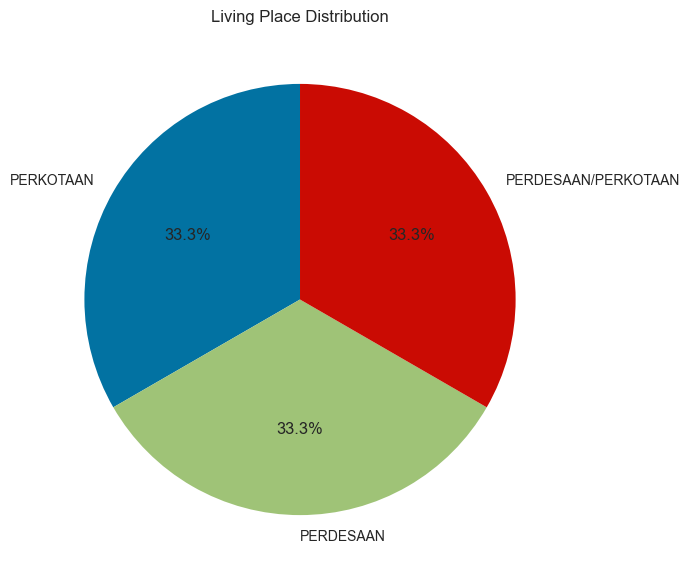

In [6]:
# Menghitung distribusi Provinsi dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(garisKemiskinan_df['daerah'].value_counts(), labels=["PERKOTAAN", "PERDESAAN", "PERDESAAN/PERKOTAAN"], autopct='%1.1f%%', startangle=90)
plt.title('Living Place Distribution')
plt.show()

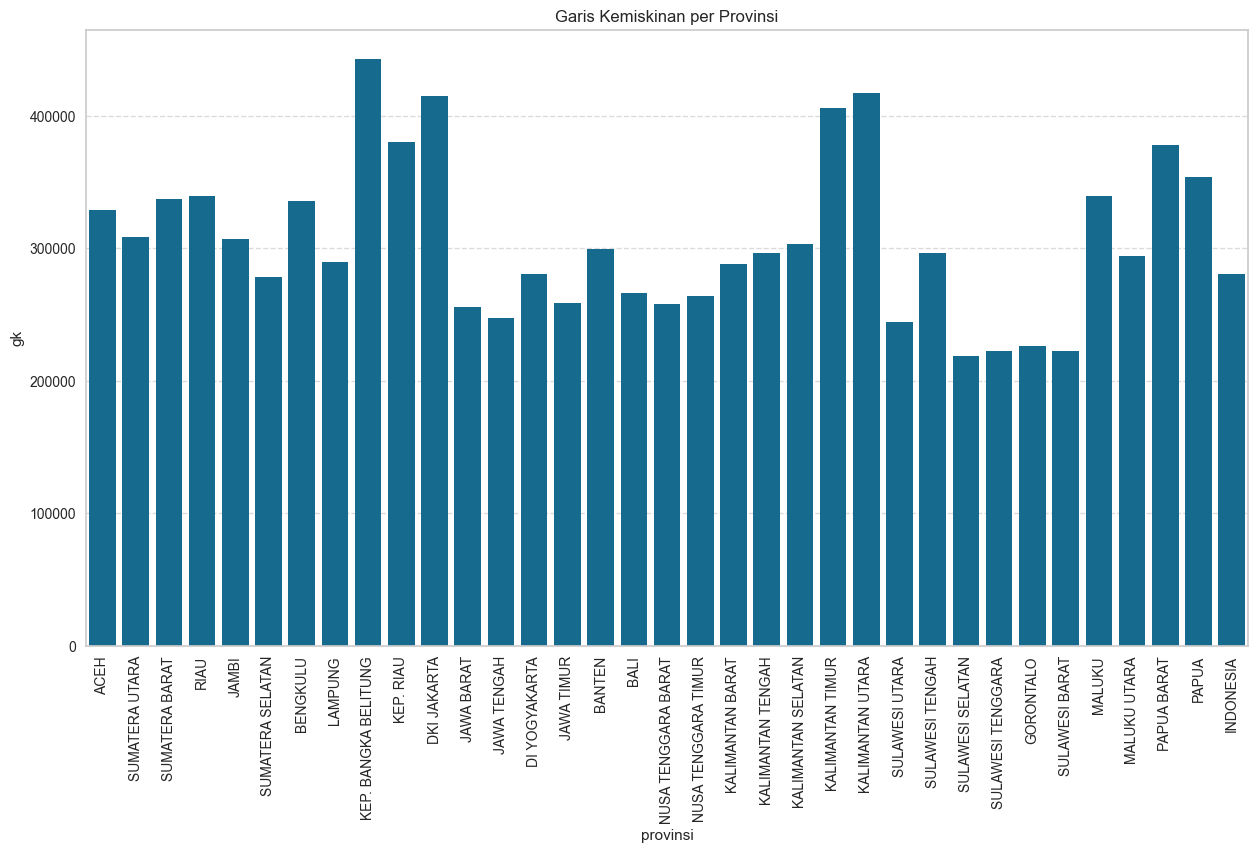

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(df, col1, col2, title):
    """
    Membuat bar chart dari kolom 'provinsi' dan 'gk'(garis kemiskinan).
    
    Parameters:
    garisKemiskinan_df : DataFrame
        DataFrame yang berisi data dengan kolom 'provinsi' dan 'gk'.
    """
    plt.figure(figsize=(15, 8))
    
    # Plot menggunakan seaborn
    sns.barplot(
        data=df,
        x=col1, 
        y=col2, 
        errorbar=None
    )
    
    # Atur tampilan
    plt.xticks(rotation=90)  # Putar nama provinsi agar tidak bertumpukan
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tampilkan plot
    plt.show()

# Contoh pemanggilan fungsi
plot_bar(garisKemiskinan_df, 'provinsi', 'gk', title="Garis Kemiskinan per Provinsi")

Terlihat, bahwa datanya sudah cukup bersih untuk proses visualisasi, tetapi untuk proses AI, perlu dilakukan pengubahan data dari kategorikal menjadi numerik, maka perlu dilakukan One Hot Encoding, terutama untuk features "jenis", "daerah", dan "periode". Untuk Provinsi itu perlu dilakukan Frequency Encoding aja.

Kita perlu mengganti kolom "jenis" menjadi "Jenis Pengeluaran" dan menghilangkan Periode Survey

In [8]:
# penyesuaian nama kolom
garisKemiskinan_df.rename(columns={'jenis': 'Jenis_Pengeluaran'}, inplace=True)
garisKemiskinan_df.drop(columns=['periode'], inplace=True)

In [9]:
garisKemiskinan_df.head()

,provinsi,Jenis_Pengeluaran,daerah,tahun,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,297479.0


In [10]:
garisKemiskinan_df.isnull().sum()

provinsi               0
Jenis_Pengeluaran      0
daerah                 0
tahun                  0
gk                   199
dtype: int64

In [11]:
# Melihat semua unique value pada masing-masing features
for col in garisKemiskinan_df:
    print(garisKemiskinan_df[col].unique())

['ACEH' 'SUMATERA UTARA' 'SUMATERA BARAT' 'RIAU' 'JAMBI'
 'SUMATERA SELATAN' 'BENGKULU' 'LAMPUNG' 'KEP. BANGKA BELITUNG'
 'KEP. RIAU' 'DKI JAKARTA' 'JAWA BARAT' 'JAWA TENGAH' 'DI YOGYAKARTA'
 'JAWA TIMUR' 'BANTEN' 'BALI' 'NUSA TENGGARA BARAT' 'NUSA TENGGARA TIMUR'
 'KALIMANTAN BARAT' 'KALIMANTAN TENGAH' 'KALIMANTAN SELATAN'
 'KALIMANTAN TIMUR' 'KALIMANTAN UTARA' 'SULAWESI UTARA' 'SULAWESI TENGAH'
 'SULAWESI SELATAN' 'SULAWESI TENGGARA' 'GORONTALO' 'SULAWESI BARAT'
 'MALUKU' 'MALUKU UTARA' 'PAPUA BARAT' 'PAPUA' 'INDONESIA']
['MAKANAN' 'NONMAKANAN' 'TOTAL']
['PERKOTAAN' 'PERDESAAN' 'PERDESAANPERKOTAAN']
[2015 2016 2017 2018 2019 2020 2021 2022 2013 2014]
[293697. 302128. 306243. ... 486168. 505468. 535547.]


In [12]:
# Fungsi untuk mencetak unique values pada masing-masing features
def ShowUnique(df):
    for col in df.columns:
        unique_values = ", ".join(map(str, df[col].unique()))
        print(f"{col} : {unique_values}\n")

ShowUnique(garisKemiskinan_df)

provinsi : ACEH, SUMATERA UTARA, SUMATERA BARAT, RIAU, JAMBI, SUMATERA SELATAN, BENGKULU, LAMPUNG, KEP. BANGKA BELITUNG, KEP. RIAU, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, DI YOGYAKARTA, JAWA TIMUR, BANTEN, BALI, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN BARAT, KALIMANTAN TENGAH, KALIMANTAN SELATAN, KALIMANTAN TIMUR, KALIMANTAN UTARA, SULAWESI UTARA, SULAWESI TENGAH, SULAWESI SELATAN, SULAWESI TENGGARA, GORONTALO, SULAWESI BARAT, MALUKU, MALUKU UTARA, PAPUA BARAT, PAPUA, INDONESIA

Jenis_Pengeluaran : MAKANAN, NONMAKANAN, TOTAL

daerah : PERKOTAAN, PERDESAAN, PERDESAANPERKOTAAN

tahun : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2013, 2014

gk : 293697.0, 302128.0, 306243.0, 319768.0, 297479.0, 306737.0, 315697.0, 324854.0, 296406.0, 305428.0, 312801.0, 323548.0, 330153.0, 347811.0, 351777.0, 360318.0, 331267.0, 346070.0, 353915.0, 362463.0, 330958.0, 346552.0, 353291.0, 361835.0, 364040.0, 377620.0, 398026.0, 399504.0, 372626.0, 387367.0, 396615.0, 397816.0, 370093.0, 38

In [13]:
num_rows = garisKemiskinan_df.shape[0]
print(f"Jumlah baris: {num_rows}")

Jumlah baris: 5460


### Insights
Berikut adalah beberapa hal yang didapat dari melihat sekilas dari apa yang dianalisis.
1. Untuk Garis kemiskinan per kapita ini memiliki beberapa pemisah, seperti Jenis Pengeluaran, Daerah tempat tinggal, Provinsi, Tahun, dan Periode.
2. Untuk jumlah data yang hilang ada pada Kolom Garis Kemiskinan sebanyak 199.
3. Untuk tipe data sendiri mayoritas sudah benar hanya saja tetap perlu diproses untuk machine learning, seperti mengubah data kategori menjadi data numerik dan float menjadi integer
4. Lalu kita bisa melakukan Clustering dan Korelasi antar kolom.
5. Data ini memiliki 5460 jumlah baris.
6. Column Periode Survey dihapus karena tidak memiliki signifikansi pada Model Machine Learning nanti
7. Kolom berisi provinsi; Jenis_Pengeluaran; daerah; tahun; gk

## Upah Minimum Provinsi

In [14]:
minUpah_df.head(50)

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0
5,ACEH,2007,850000.0
6,ACEH,2008,1000000.0
7,ACEH,2009,1200000.0
8,ACEH,2010,1300000.0
9,ACEH,2011,1350000.0


In [15]:
minUpah_df.tail()

,provinsi,tahun,ump
730,INDONESIA,2018,2268874.0
731,INDONESIA,2019,2455662.0
732,INDONESIA,2020,2672371.0
733,INDONESIA,2021,2684743.0
734,INDONESIA,2022,2729463.0


In [16]:
minUpah_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB


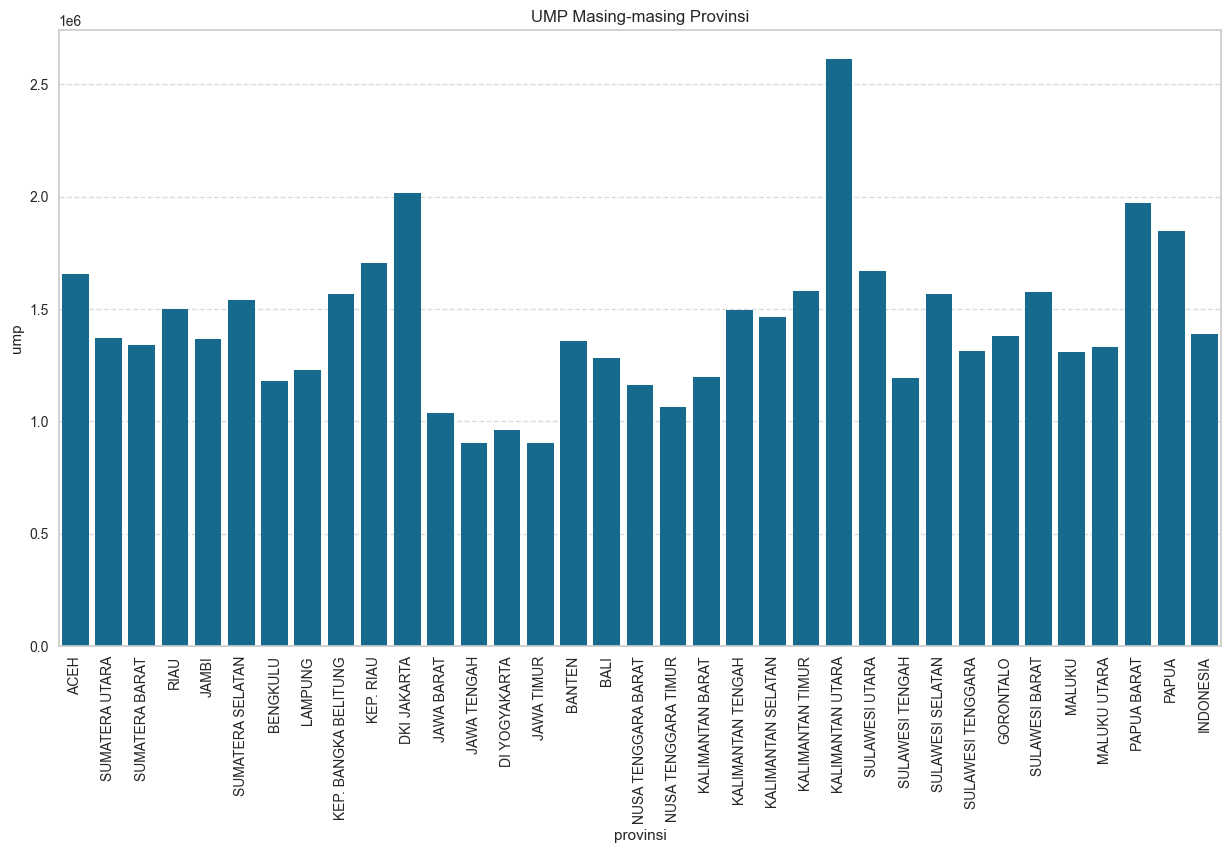

In [17]:
plot_bar(minUpah_df, "provinsi", "ump", title="UMP Masing-masing Provinsi")

In [18]:
minUpah_df.describe()

,tahun,ump
count,735.000000,7.110000e+02
mean,2012.000000,1.402290e+06
std,6.059424,8.762622e+05
min,2002.000000,2.450000e+05
25%,2007.000000,6.639865e+05
50%,2012.000000,1.125207e+06
75%,2017.000000,2.074002e+06
max,2022.000000,4.641854e+06


In [19]:
minUpah_df.isnull().sum()

provinsi     0
tahun        0
ump         24
dtype: int64

In [20]:
ShowUnique(minUpah_df)

provinsi : ACEH, SUMATERA UTARA, SUMATERA BARAT, RIAU, JAMBI, SUMATERA SELATAN, BENGKULU, LAMPUNG, KEP. BANGKA BELITUNG, KEP. RIAU, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, DI YOGYAKARTA, JAWA TIMUR, BANTEN, BALI, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN BARAT, KALIMANTAN TENGAH, KALIMANTAN SELATAN, KALIMANTAN TIMUR, KALIMANTAN UTARA, SULAWESI UTARA, SULAWESI TENGAH, SULAWESI SELATAN, SULAWESI TENGGARA, GORONTALO, SULAWESI BARAT, MALUKU, MALUKU UTARA, PAPUA BARAT, PAPUA, INDONESIA

tahun : 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

ump : 330000.0, 425000.0, 550000.0, 620000.0, 820000.0, 850000.0, 1000000.0, 1200000.0, 1300000.0, 1350000.0, 1400000.0, 1550000.0, 1750000.0, 1900000.0, 2118500.0, 2500000.0, 2700000.0, 2916810.0, 3165031.0, 3166460.0, 464000.0, 505000.0, 537000.0, 600000.0, 737794.0, 761000.0, 822205.0, 905000.0, 965000.0, 1035500.0, 1375000.0, 1505850.0, 1625000.0, 1811875.0, 19613

In [21]:
num_rows = minUpah_df.shape[0]
print(f"Jumlah baris: {num_rows}")

Jumlah baris: 735


### Insights

1. Terdapat 24 data ump yang kosong
2. Format nilai juga masih belum sesuai
3. Bisa digabung dengan tabel garis kemiskinan
4. Terdapat tahun yang memiliki rentang yang berbeda dengan data sebelumnya
5. Hanya terdapat 735 jumlah baris
6. Memiliki data UMP dari tahun 2002 hingga 2022 di setiap provinsi
7. Data berisi : Provinsi; Tahun; UMP
8. UMP tertinggi ada pada Kalimantar utara, tetapi sepertinya itu data outliers(dicek lagi)

## Pengeluaran

In [22]:
pengeluaran_df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [23]:
pengeluaran_df.tail()

,provinsi,daerah,jenis,tahun,peng
4615,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2018,1124716.0
4616,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2019,1165240.0
4617,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2020,1225684.0
4618,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2021,1264589.0
4619,INDONESIA,PERDESAANPERKOTAAN,TOTAL,2022,1327782.0


In [24]:
# Penyesuaian nama kolom
pengeluaran_df.rename(columns={'jenis': 'Jenis_Pengeluaran'}, inplace=True)

In [25]:
pengeluaran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   provinsi           4620 non-null   object 
 1   daerah             4620 non-null   object 
 2   Jenis_Pengeluaran  4620 non-null   object 
 3   tahun              4620 non-null   int64  
 4   peng               4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


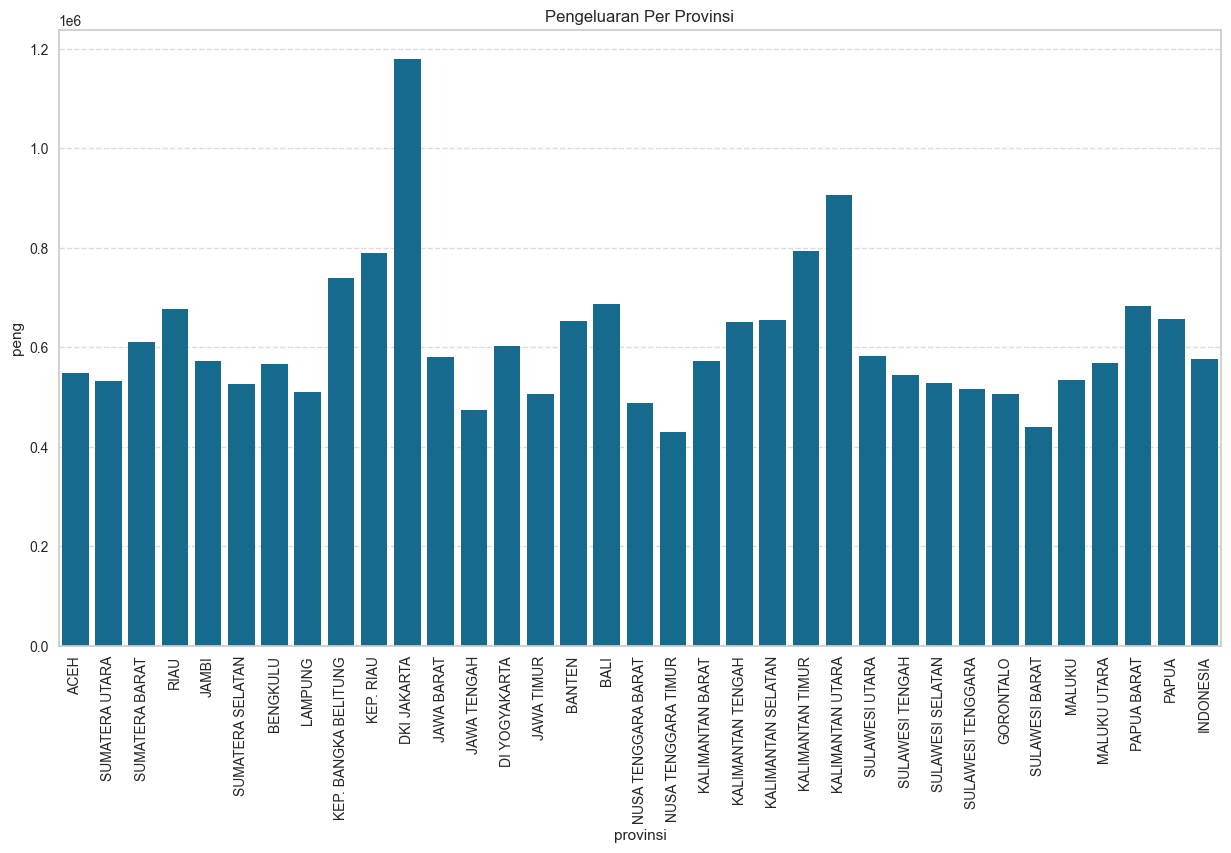

In [26]:
plot_bar(pengeluaran_df, "provinsi", "peng", title="Pengeluaran Per Provinsi")

In [27]:
pengeluaran_df.describe()

,tahun,peng
count,4620.000000,4.512000e+03
mean,2015.045455,6.012012e+05
std,4.416124,3.524052e+05
min,2007.000000,5.921600e+04
25%,2011.750000,3.476272e+05
50%,2015.000000,5.206945e+05
75%,2019.000000,7.577325e+05
max,2022.000000,2.525347e+06


In [28]:
pengeluaran_df.isnull().sum()

provinsi               0
daerah                 0
Jenis_Pengeluaran      0
tahun                  0
peng                 108
dtype: int64

In [29]:
pengeluaran_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   provinsi           4620 non-null   object 
 1   daerah             4620 non-null   object 
 2   Jenis_Pengeluaran  4620 non-null   object 
 3   tahun              4620 non-null   int64  
 4   peng               4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB


In [30]:
ShowUnique(pengeluaran_df)

provinsi : ACEH, SUMATERA UTARA, SUMATERA BARAT, RIAU, JAMBI, SUMATERA SELATAN, BENGKULU, LAMPUNG, KEP. BANGKA BELITUNG, KEP. RIAU, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, DI YOGYAKARTA, JAWA TIMUR, BANTEN, BALI, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN BARAT, KALIMANTAN TENGAH, KALIMANTAN SELATAN, KALIMANTAN TIMUR, KALIMANTAN UTARA, SULAWESI UTARA, SULAWESI TENGAH, SULAWESI SELATAN, SULAWESI TENGGARA, GORONTALO, SULAWESI BARAT, MALUKU, MALUKU UTARA, PAPUA BARAT, PAPUA, INDONESIA

daerah : PERDESAAN, PERKOTAAN, PERDESAANPERKOTAAN

Jenis_Pengeluaran : MAKANAN, NONMAKANAN, TOTAL

tahun : 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

peng : 195176.0, 218781.0, 247427.0, 275749.0, 308000.0, 326182.0, 337761.0, 368080.0, 395136.0, 412251.0, 494150.0, 506656.0, 520759.0, 566947.0, 597940.0, 633566.0, 101285.0, 112507.0, 121818.0, 139779.0, 166699.0, 166064.0, 171013.0, 195503.0, 260183.0, 272829.0, 287004.0, 331248.0, 334915.0, 3786

In [31]:
num_rows = pengeluaran_df.shape[0]
print(f"Jumlah baris: {num_rows}")

Jumlah baris: 4620


### Insights

1. 108 nilai yang kosong
2. Jenis data perlu dikoreksi lagi
3. Bisa juga digabungkan dengan 2 tabel sebelumnya
4. Terdapat 4620 buah baris
5. Memiliki data pada tahun 2007 hingga 2022
6. Data berisi : Provinsi; Daerah; Jenis_Pengeluaran; Tahun; Pengeluaran

## Rata-rata Upah

In [32]:
avgUpah_df.head(15)

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065
5,ACEH,2020,18099
6,ACEH,2021,17037
7,ACEH,2022,16772
8,SUMATERA UTARA,2015,10618
9,SUMATERA UTARA,2016,11646


In [33]:
avgUpah_df.tail()

,provinsi,tahun,upah
275,INDONESIA,2018,15275
276,INDONESIA,2019,15823
277,INDONESIA,2020,17696
278,INDONESIA,2021,18089
279,INDONESIA,2022,17542


In [34]:
avgUpah_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB


In [35]:
avgUpah_df.rename(columns={'upah': 'Upah_Rata_rata'}, inplace=True)

In [36]:
avgUpah_df.describe()

,tahun,Upah_Rata_rata
count,280.00000,280.000000
mean,2018.50000,16621.010714
std,2.29539,4371.803056
min,2015.00000,8525.000000
25%,2016.75000,13468.750000
50%,2018.50000,15845.000000
75%,2020.25000,18634.750000
max,2022.00000,32685.000000


In [37]:
avgUpah_df.isnull().sum()

provinsi          0
tahun             0
Upah_Rata_rata    0
dtype: int64

In [38]:
ShowUnique(avgUpah_df)

provinsi : ACEH, SUMATERA UTARA, SUMATERA BARAT, RIAU, JAMBI, SUMATERA SELATAN, BENGKULU, LAMPUNG, KEP. BANGKA BELITUNG, KEP. RIAU, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, DI YOGYAKARTA, JAWA TIMUR, BANTEN, BALI, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, KALIMANTAN BARAT, KALIMANTAN TENGAH, KALIMANTAN SELATAN, KALIMANTAN TIMUR, KALIMANTAN UTARA, SULAWESI UTARA, SULAWESI TENGAH, SULAWESI SELATAN, SULAWESI TENGGARA, GORONTALO, SULAWESI BARAT, MALUKU, MALUKU UTARA, PAPUA BARAT, PAPUA, INDONESIA

tahun : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

Upah_Rata_rata : 11226, 13627, 14809, 13814, 15065, 18099, 17037, 16772, 10618, 11646, 13396, 13257, 14061, 15949, 15486, 15131, 11241, 13206, 14378, 14431, 15210, 17571, 16630, 15887, 13303, 15506, 15182, 15613, 16270, 18411, 19144, 18626, 12954, 13169, 14326, 14007, 14304, 15840, 16043, 16042, 11622, 12523, 12690, 13214, 13580, 15072, 15873, 15978, 12491, 13471, 14011, 14353, 14511, 17407, 18271, 16501, 10104, 10385, 11234, 11779, 12575, 1491

In [39]:
num_rows = avgUpah_df.shape[0]
print(f"Jumlah baris: {num_rows}")

Jumlah baris: 280


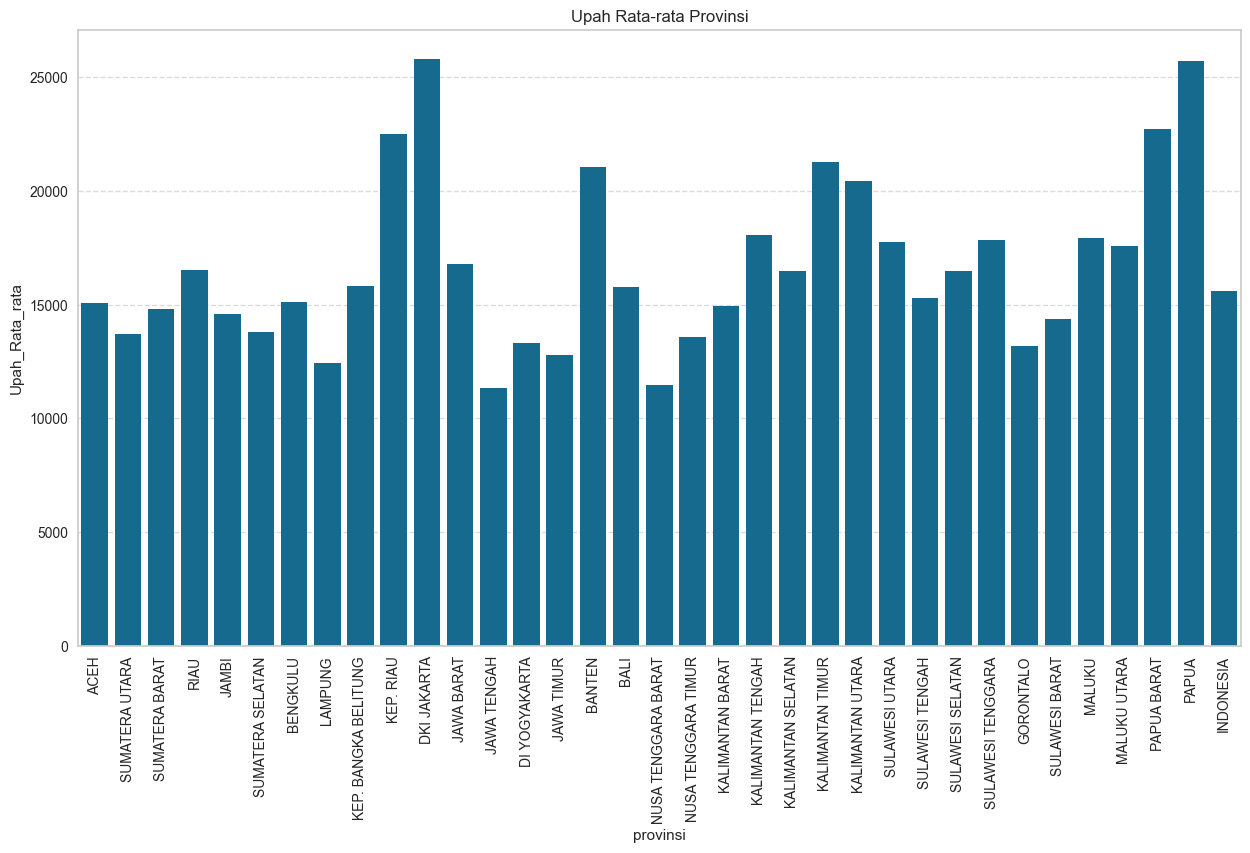

In [40]:
plot_bar(avgUpah_df, "provinsi", "Upah_Rata_rata", title="Upah Rata-rata Provinsi")

### Insights

1. Data cukup bersih dan tidak ada data yang kosong
2. Jenis data sudah baik, hanya perlu di convert seperti dataframe sebelumnya
3. Bisa digabung dengan 3 data sebelumnya
4. Hanya terdapat 280 jumlah baris pada data tersebut
5. Hanya memiliki data dari tahun 2015 hingga 2022
6. Upah rata-rata provinsi paling tinggi ada di DKI Jakarta dan Papua, tetapi sepertinya ada data outliers pada Papua
7. Data kolom berisi: Provinsi; Tahun; dan Upah rata-rata

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

================================================================================

Terdapat 8 tahapan (Menurut Saya)
1. Gabung semua data menjadi 1 Dataframe<br>
    Pada proses ini terutama karena mereka memiliki beberapa kesamaan, seperti features tahun, maka perlu dilakukan Merge Method `outer`. Meskipun resikonya akan meghasilkan nilai Nan, tetapi itu yang memang harus diproses
2. Memproses Data Kosong
3. Menghapus data duplikat
4. Normalisasi atau Standarisasi Fitur
5. Deteksi dan Penanganan Outlier
6. Lakukan Encoder
7. Lakukan analisa korelasi
8. Binning
9. Buat Visualisasi hubungan antar data

### 1. Gabung semua data menjadi 1 Dataframe
- garisKemiskinan_df<br>
Data berisi : provinsi; Jenis_Pengeluaran; daerah; tahun; gk
- minUpah_df<br>
Data berisi : Provinsi; Tahun; UMP
- pengeluaran_df<br>
Data berisi : Provinsi; Daerah; Jenis_Pengeluaran; Tahun; Pengeluaran(Jumlah Pengeluaran)
- avgUpah_df<br>
Data berisi :Provinsi; Tahun; dan Upah rata-rata

Dapat terlihat bahwa keempat data memiliki jenis kolom data yang sama, yaitu Provinsi dan Tahun.

In [41]:
# Gabungkan garisKemiskinan_df dengan minUpah_df
merged_df = pd.merge(garisKemiskinan_df, minUpah_df, on=['provinsi', 'tahun'], how='outer')
# Gabungkan hasil dengan pengeluaran_df
merged_df = pd.merge(merged_df, pengeluaran_df, on=['provinsi', 'tahun', 'Jenis_Pengeluaran', 'daerah'], how='outer')
# Gabungkan hasil dengan avgUpah_df
merged_df = pd.merge(merged_df, avgUpah_df, on=['provinsi', 'tahun'], how='outer')
# ============================================

In [42]:
merged_df.tail(10)

,provinsi,Jenis_Pengeluaran,daerah,tahun,gk,ump,peng,Upah_Rata_rata
7725,SUMATERA UTARA,NONMAKANAN,PERDESAANPERKOTAAN,2022,137244.0,2522610.0,552569.0,15131.0
7726,SUMATERA UTARA,NONMAKANAN,PERDESAANPERKOTAAN,2022,143402.0,2522610.0,552569.0,15131.0
7727,SUMATERA UTARA,NONMAKANAN,PERKOTAAN,2022,151633.0,2522610.0,668871.0,15131.0
7728,SUMATERA UTARA,NONMAKANAN,PERKOTAAN,2022,157137.0,2522610.0,668871.0,15131.0
7729,SUMATERA UTARA,TOTAL,PERDESAAN,2022,534184.0,2522610.0,1035638.0,15131.0
7730,SUMATERA UTARA,TOTAL,PERDESAAN,2022,563783.0,2522610.0,1035638.0,15131.0
7731,SUMATERA UTARA,TOTAL,PERDESAANPERKOTAAN,2022,561004.0,2522610.0,1216496.0,15131.0
7732,SUMATERA UTARA,TOTAL,PERDESAANPERKOTAAN,2022,592025.0,2522610.0,1216496.0,15131.0
7733,SUMATERA UTARA,TOTAL,PERKOTAAN,2022,583221.0,2522610.0,1358335.0,15131.0
7734,SUMATERA UTARA,TOTAL,PERKOTAAN,2022,615227.0,2522610.0,1358335.0,15131.0


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   provinsi           7735 non-null   object 
 1   Jenis_Pengeluaran  7350 non-null   object 
 2   daerah             7350 non-null   object 
 3   tahun              7735 non-null   int64  
 4   gk                 5261 non-null   float64
 5   ump                5811 non-null   float64
 6   peng               7210 non-null   float64
 7   Upah_Rata_rata     5040 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 483.6+ KB


In [44]:
merged_df.describe()

,tahun,gk,ump,peng,Upah_Rata_rata
count,7735.000000,5261.000000,5.811000e+03,7.210000e+03,5040.000000
mean,2015.728507,303904.185516,2.147095e+06,6.611022e+05,16621.010714
std,4.535580,158176.024903,7.205896e+05,3.592154e+05,4364.422282
min,2002.000000,48561.000000,2.450000e+05,5.921600e+04,8525.000000
25%,2013.000000,144674.000000,1.704608e+06,4.102310e+05,13468.750000
50%,2016.000000,313294.000000,2.183883e+06,5.795070e+05,15845.000000
75%,2019.000000,410188.000000,2.647767e+06,8.312030e+05,18634.750000
max,2022.000000,872843.000000,4.641854e+06,2.525347e+06,32685.000000


In [45]:
merged_df.isnull().sum()

provinsi                0
Jenis_Pengeluaran     385
daerah                385
tahun                   0
gk                   2474
ump                  1924
peng                  525
Upah_Rata_rata       2695
dtype: int64

### 2. Memproses Data Kosong

In [103]:
# Menghapus semua data kosong(Apakah jumlah data akan berkurang drastis?)
temp_df = merged_df
temp_df = temp_df.dropna()
num_rows = temp_df.shape[0]
print(f"Jumlah baris: {num_rows}")

Jumlah baris: 4992


Hasil menghapus data kosong masih memberikan jumlah data diatas 2500 baris

In [104]:
# Melihat berapa jumlah duplikasi data
temp_df.duplicated().sum()

np.int64(0)

In [105]:
temp_df[temp_df.duplicated()]


,provinsi,Jenis_Pengeluaran,daerah,tahun,gk,ump,peng,Upah_Rata_rata


Tidak terdapat duplikasi data pada dataframe yang sudah dibuat. Hal ini dapat terjadi karena kita menggunakan data tahunan yang dimana kemungkinan duplikasi hanya terjadi pada tahun yang sama meskipun pada akhirnya data tersebut tidak bisa dianggap sama karena memiliki nilai yang berbeda di kolom yang lain, seperti pengeluaran dan UMP.

### 3. Identifikasi Data
Mengecek sekali lagi apakah terdapat perubahan data yang perlu dilakukan agar proses selanjutnya lebih mudah.

In [106]:
# Mengubah nilai float menjadi bentuk integer
# data gk, ump, peng, Upah_Rata_rata
temp_df[['gk', 'ump', 'peng', 'Upah_Rata_rata']] = temp_df[['gk', 'ump', 'peng', 'Upah_Rata_rata']].astype(int)
# Mengubah nama kolom agar lebih rapih
temp_df.rename(columns={'gk': 'Garis Kemiskinan'}, inplace=True)
temp_df.rename(columns={'ump': 'Upah Minimum Provinsi'}, inplace=True)
temp_df.rename(columns={'peng': 'Pengeluaran'}, inplace=True)

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 77 to 7734
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               4992 non-null   object
 1   Jenis_Pengeluaran      4992 non-null   object
 2   daerah                 4992 non-null   object
 3   tahun                  4992 non-null   int64 
 4   Garis Kemiskinan       4992 non-null   int64 
 5   Upah Minimum Provinsi  4992 non-null   int64 
 6   Pengeluaran            4992 non-null   int64 
 7   Upah_Rata_rata         4992 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 351.0+ KB


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/3811011257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[['gk', 'ump', 'peng', 'Upah_Rata_rata']] = temp_df[['gk', 'ump', 'peng', 'Upah_Rata_rata']].astype(int)
/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/3811011257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.rename(columns={'gk': 'Garis Kemiskinan'}, inplace=True)
/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/3811011257.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [107]:
temp_df.head()

,provinsi,Jenis_Pengeluaran,daerah,tahun,Garis Kemiskinan,Upah Minimum Provinsi,Pengeluaran,Upah_Rata_rata
77,ACEH,MAKANAN,PERDESAAN,2015,297479,1900000,395136,11226
78,ACEH,MAKANAN,PERDESAAN,2015,306737,1900000,395136,11226
79,ACEH,MAKANAN,PERDESAANPERKOTAAN,2015,296406,1900000,415354,11226
80,ACEH,MAKANAN,PERDESAANPERKOTAAN,2015,305428,1900000,415354,11226
81,ACEH,MAKANAN,PERKOTAAN,2015,293697,1900000,466355,11226


In [108]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4992 entries, 77 to 7734
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   provinsi               4992 non-null   object
 1   Jenis_Pengeluaran      4992 non-null   object
 2   daerah                 4992 non-null   object
 3   tahun                  4992 non-null   int64 
 4   Garis Kemiskinan       4992 non-null   int64 
 5   Upah Minimum Provinsi  4992 non-null   int64 
 6   Pengeluaran            4992 non-null   int64 
 7   Upah_Rata_rata         4992 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 351.0+ KB


### 4. Deteksi dan Penanganan Outlier

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


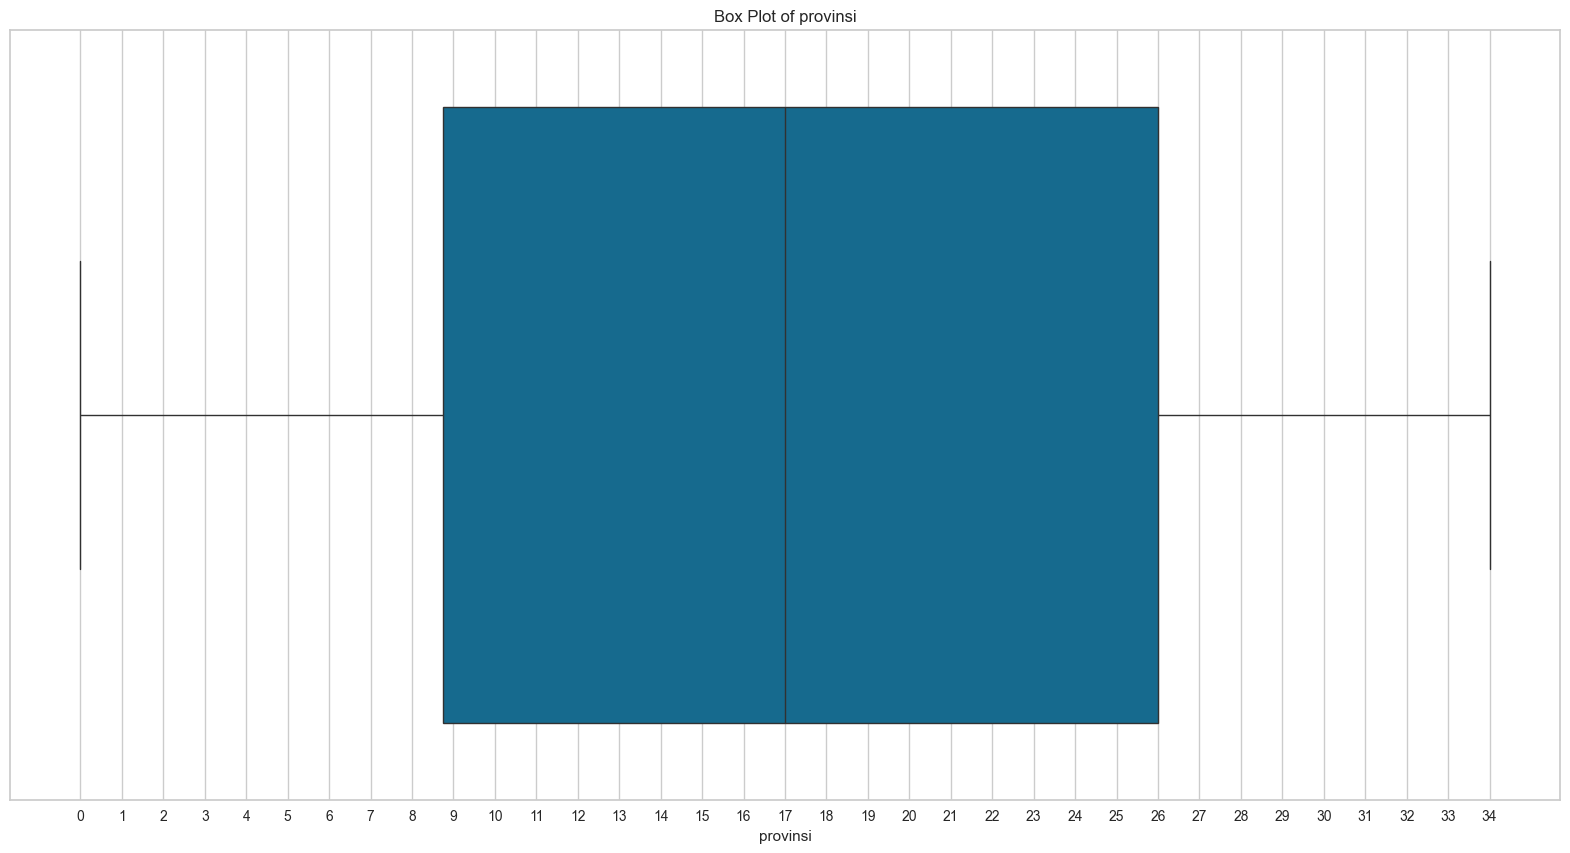

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


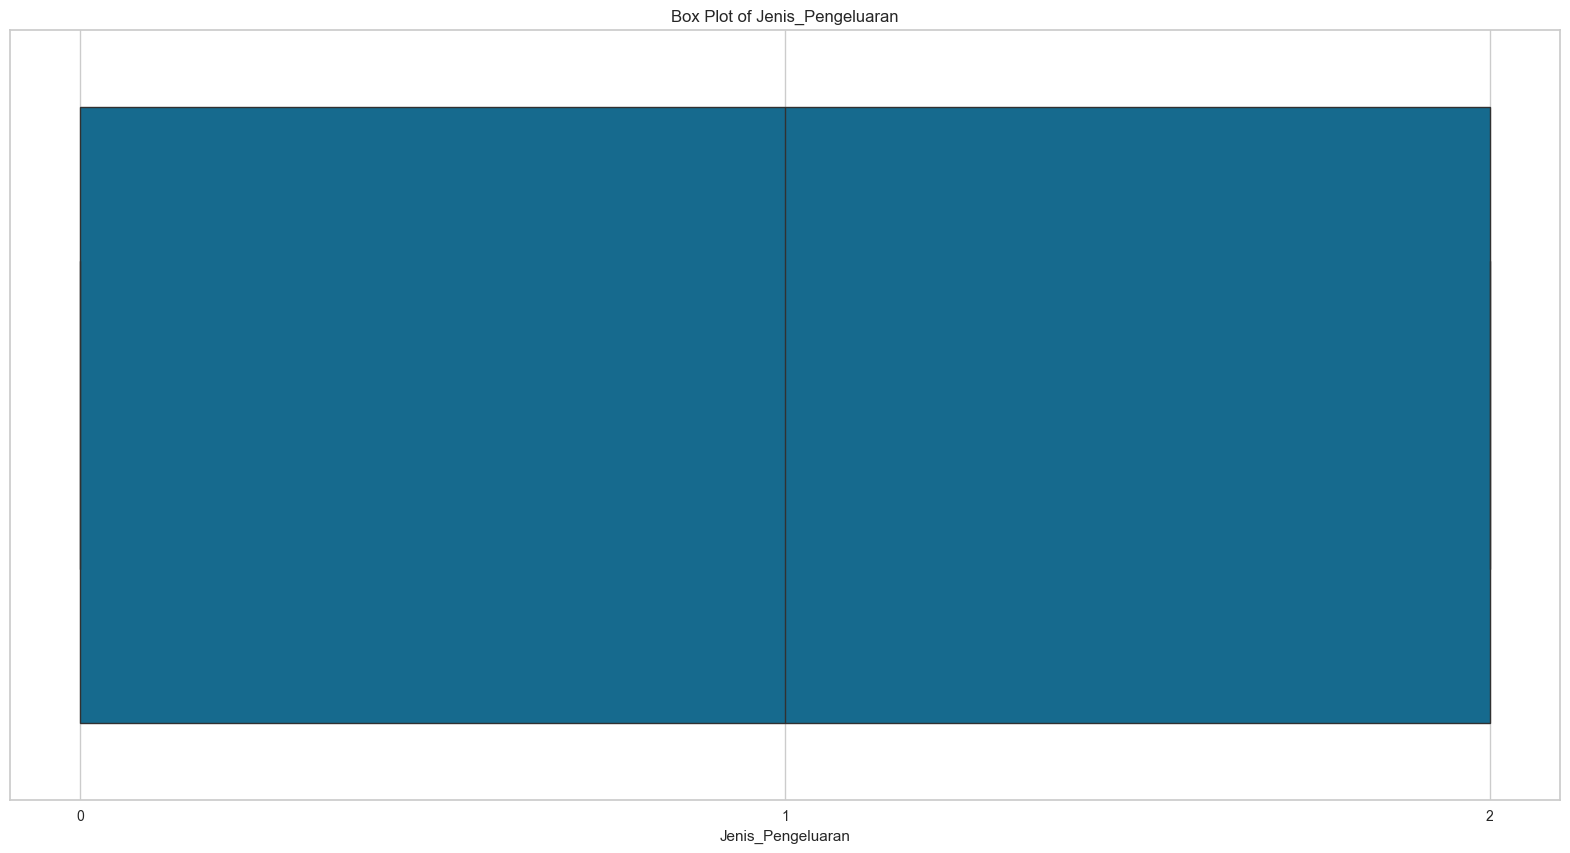

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


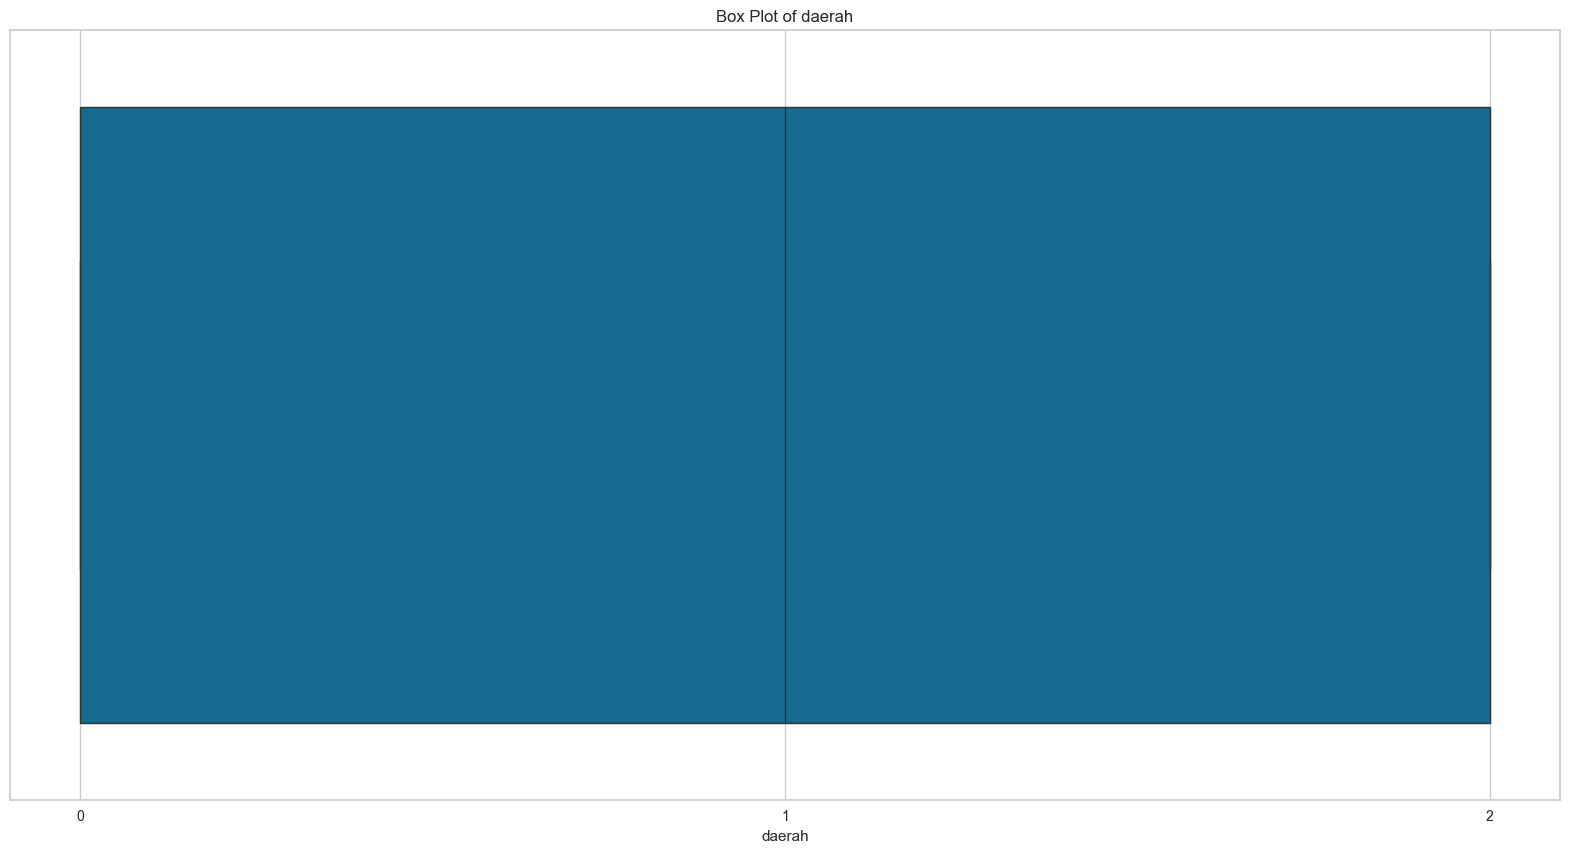

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


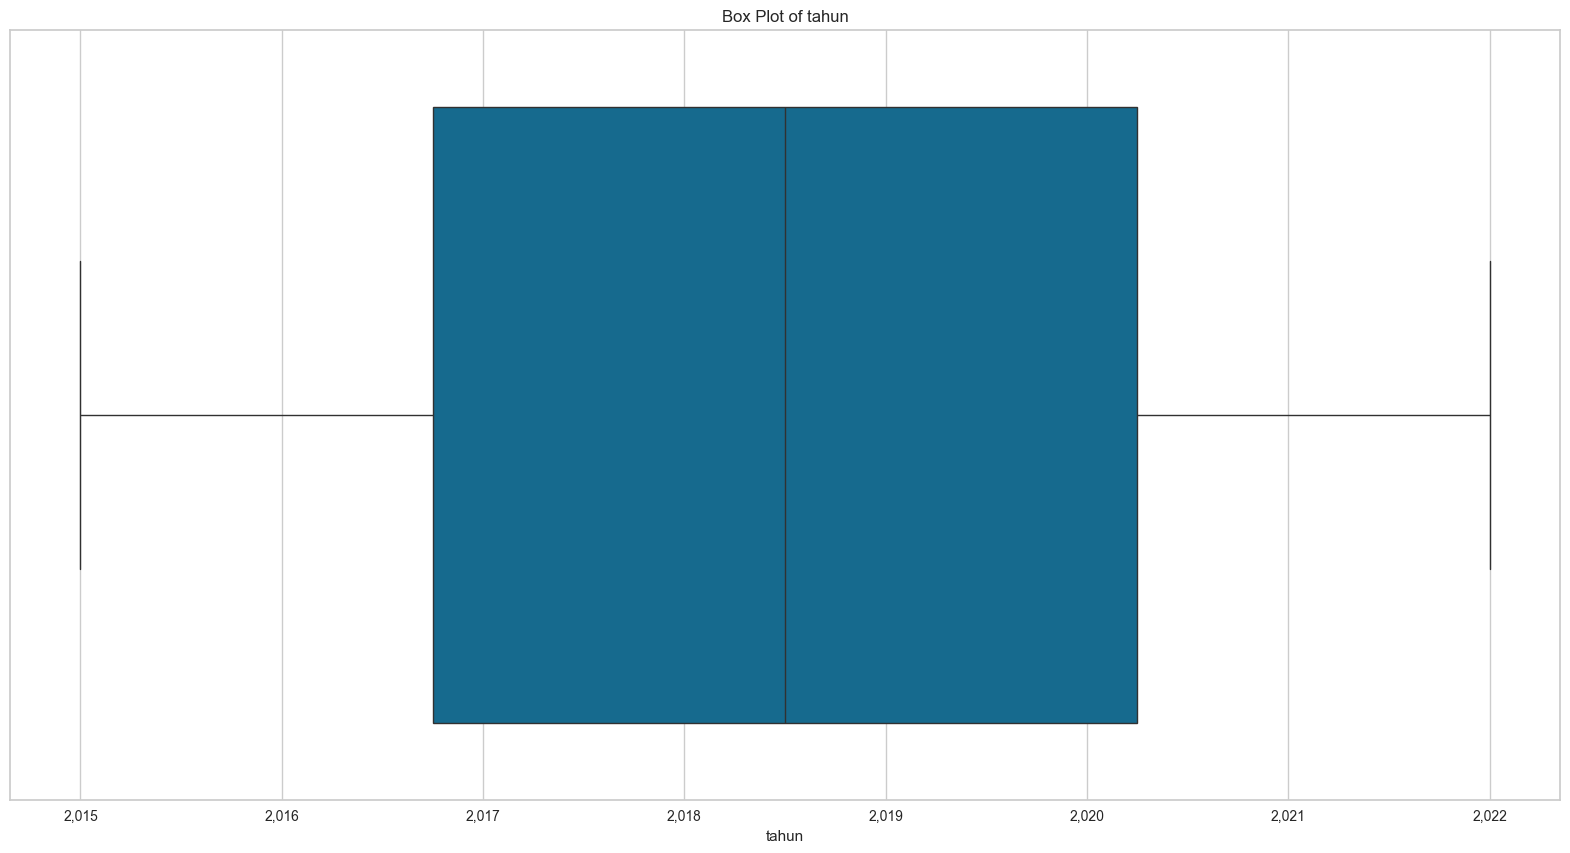

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


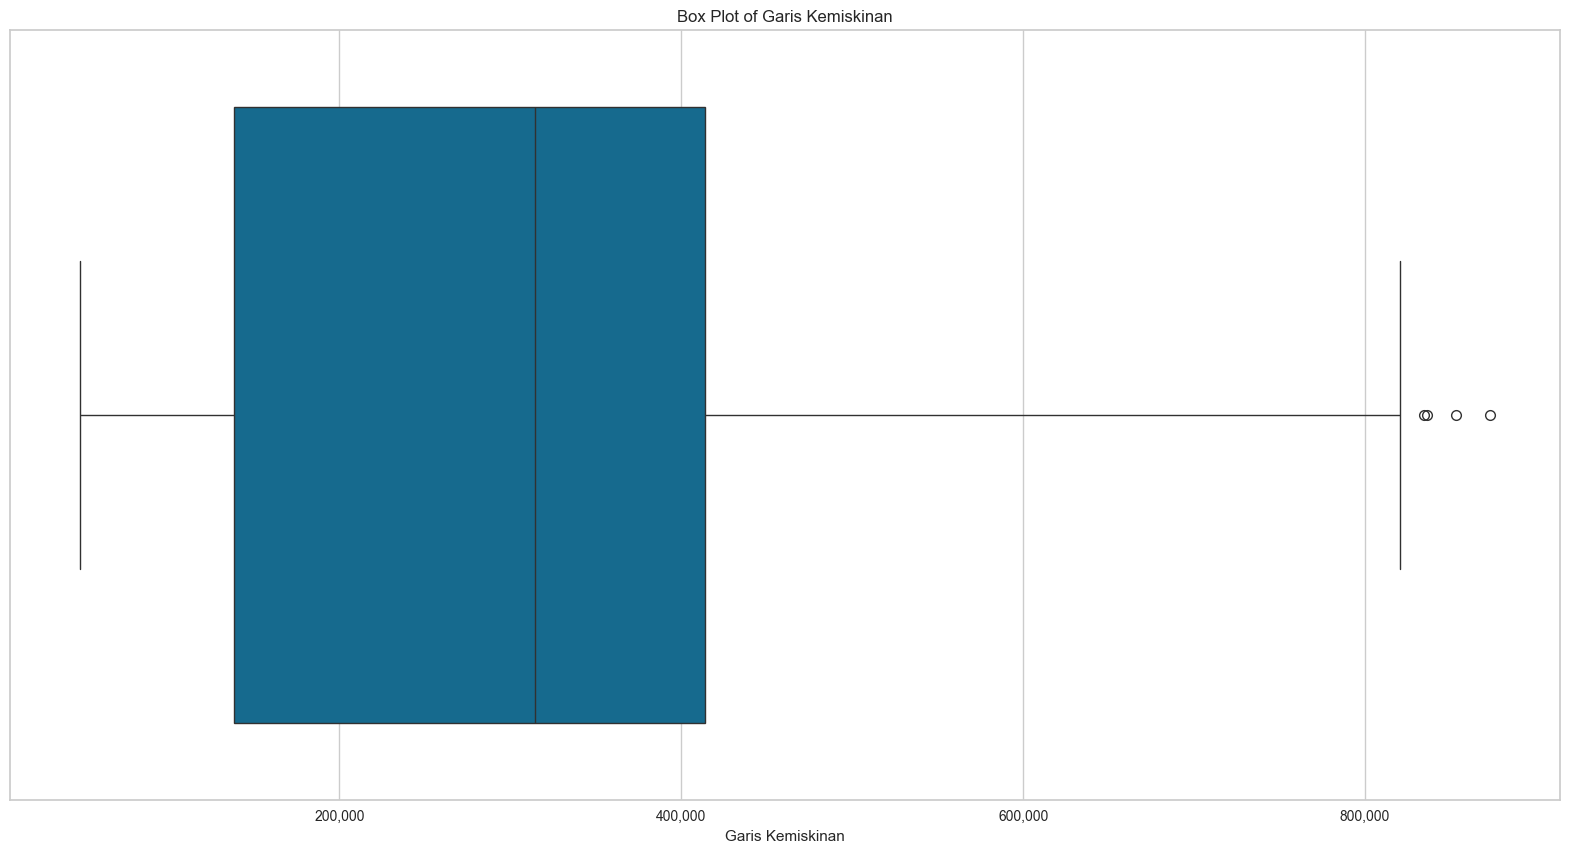

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


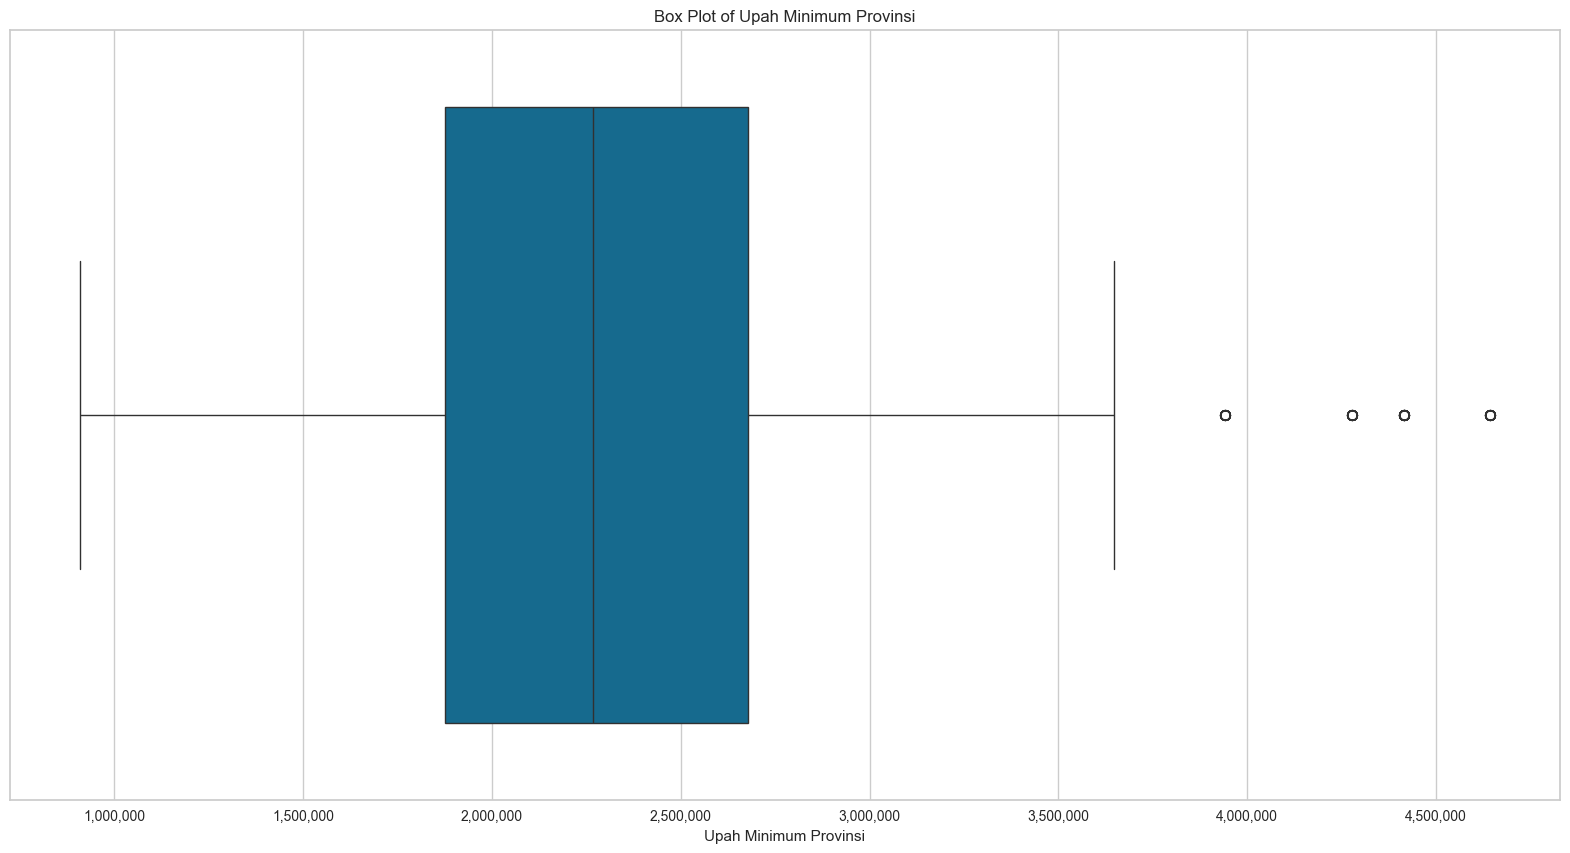

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


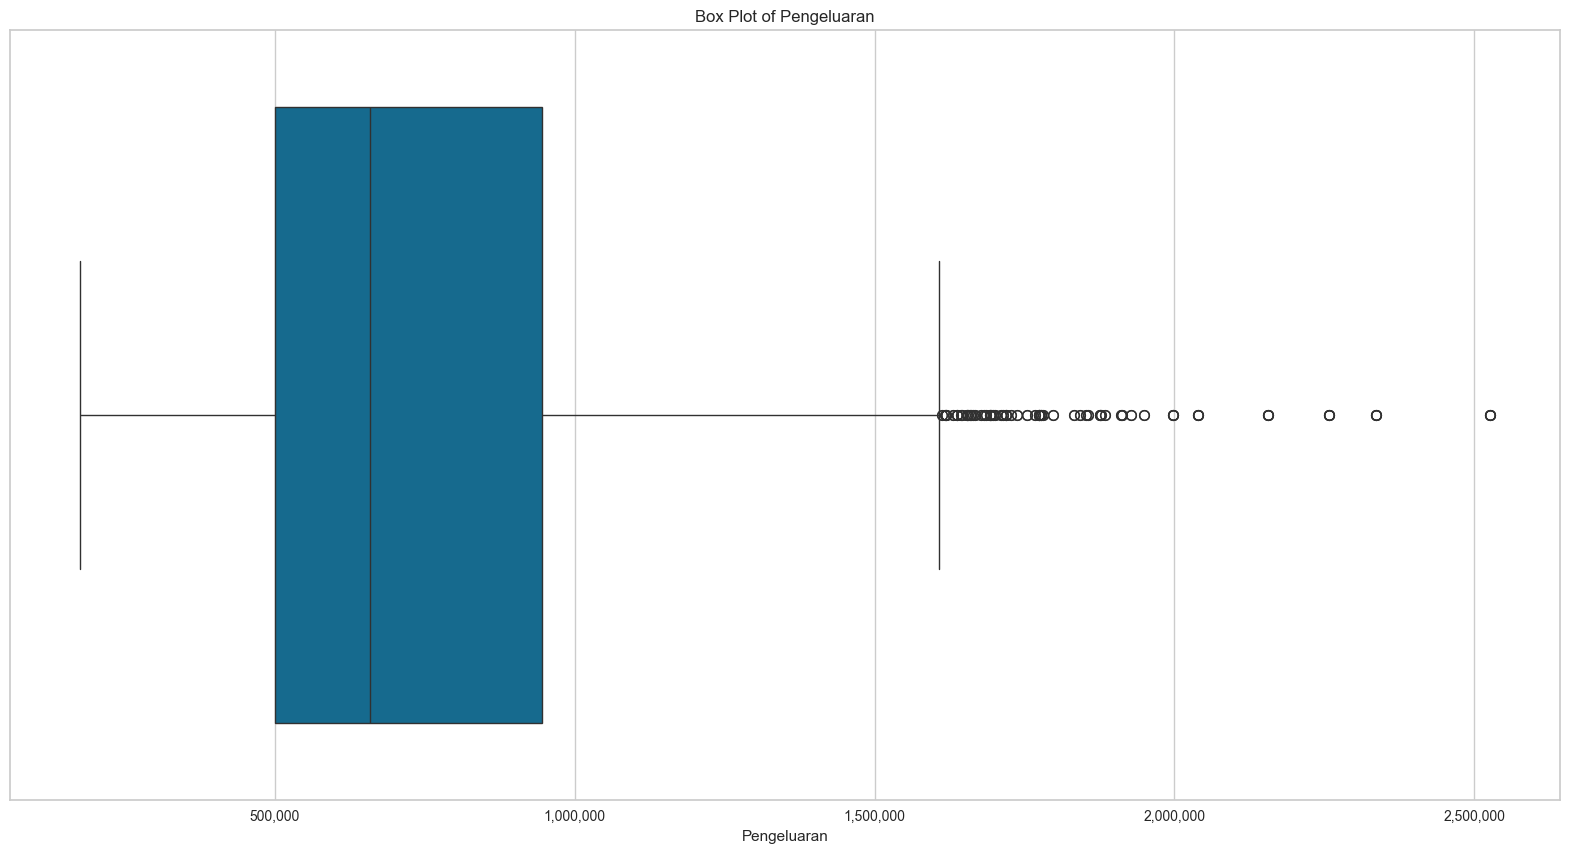

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


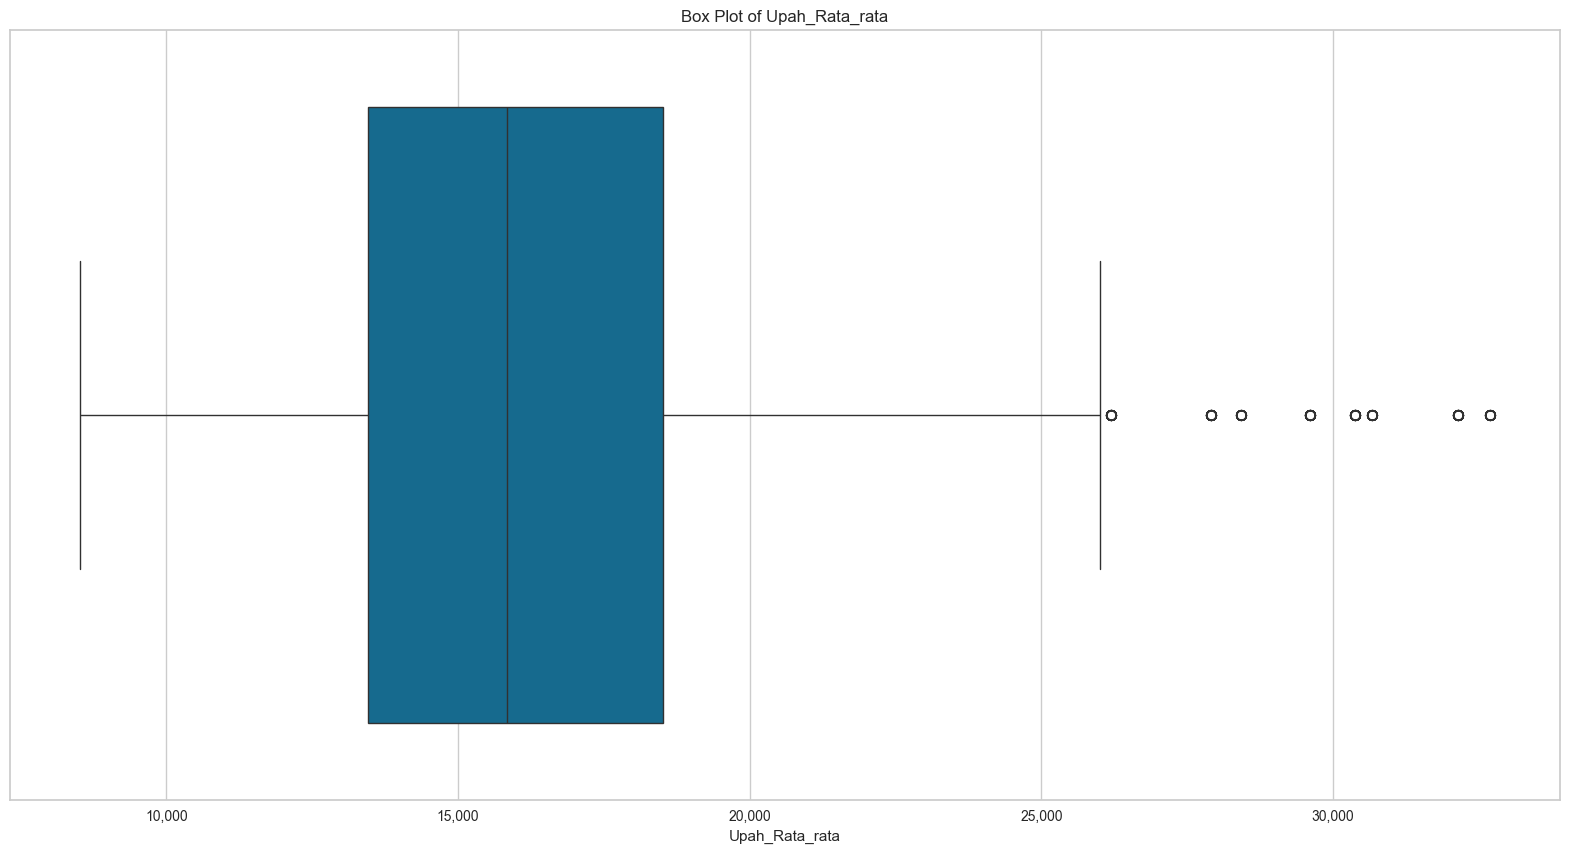

In [109]:
for feature in temp_df:
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x=temp_df[feature])
    # Ambil nilai ticks dan ubah ke format angka biasa
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
    plt.title(f'Box Plot of {feature}')
    plt.show()

1. Garis Kemiskinan Memiliki beberapa data outliers
2. UMP juga memiliki beberapa outliers
3. Pengeluaran memiliki banyak outliers(harus dikaji)
4. Upah Rata-rata hanya memiliki beberapa outliers

In [110]:
def count_outliers_iqr(df, column):
    """
    Menghitung jumlah data outliers yang ada pada masing-masing kolom
    """
    Q1 = df[column].quantile(0.25)  # Quartile 1
    Q3 = df[column].quantile(0.75)  # Quartile 3
    IQR = Q3 - Q1  # Rentang Interkuartil

    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Data yang di luar batas
    return len(outliers)  # Jumlah outlier

In [111]:
# Mengunakan Metode Agregasi
def replace_outliers_with_median(df, column_name):
    """
    Mengganti outliers pada kolom tertentu dengan nilai median menggunakan metode IQR.
    
    Parameters:
    df (pd.DataFrame): DataFrame yang berisi data.
    column_name (str): Nama kolom yang ingin diproses.
    
    Returns:
    pd.DataFrame: DataFrame dengan outliers yang telah diganti median.
    """
    Q1 = df[column_name].quantile(0.25)  # Kuartil pertama (Q1)
    Q3 = df[column_name].quantile(0.75)  # Kuartil ketiga (Q3)
    IQR = Q3 - Q1  # Interquartile Range (IQR)

    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    median_value = df[column_name].median()  # Nilai median
    
    # Ganti outlier dengan median menggunakan apply()
    df[column_name] = df[column_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

In [112]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hapus baris yang memiliki outliers
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

#### Garis Kemiskinan - Outliers

In [113]:
outlier_count = count_outliers_iqr(temp_df, "Garis Kemiskinan")
print(f"Jumlah outlier di 'Garis Kemiskinan': {outlier_count}")

Jumlah outlier di 'Garis Kemiskinan': 4


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1298284063.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1182244842.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


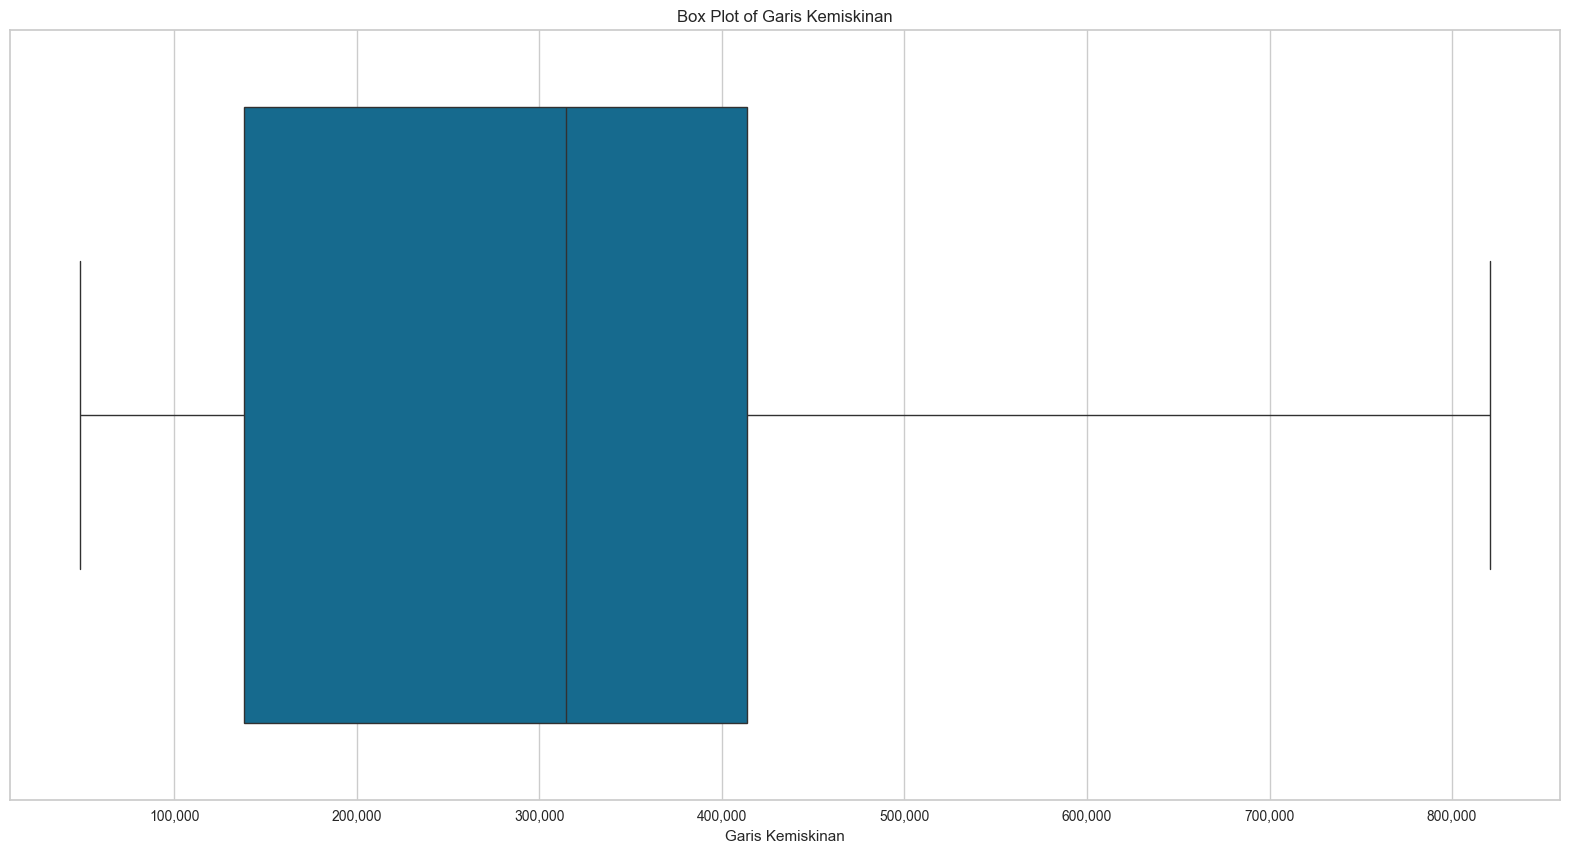

In [114]:
# Menggunakan fungsi untuk mengganti outliers dengan median
temp_df = replace_outliers_with_median(temp_df, "Garis Kemiskinan")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=temp_df["Garis Kemiskinan"])
# Ambil nilai ticks dan ubah ke format angka biasa
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
plt.title(f'Box Plot of {"Garis Kemiskinan"}')
plt.show()

In [115]:
outlier_count = count_outliers_iqr(temp_df, "Garis Kemiskinan")
print(f"Jumlah outlier di 'Garis Kemiskinan': {outlier_count}")

Jumlah outlier di 'Garis Kemiskinan': 0


In [116]:
temp_df = remove_outliers_iqr(temp_df, 'Garis Kemiskinan')
outlier_count = count_outliers_iqr(temp_df, "Garis Kemiskinan")
print(f"Jumlah outlier di 'Garis Kemiskinan': {outlier_count}")

Jumlah outlier di 'Garis Kemiskinan': 0


#### Upah Minimum Provinsi - Outliers

In [120]:
outlier_count = count_outliers_iqr(temp_df, "Upah Minimum Provinsi")
print(f"Jumlah outlier di 'Upah Minimum Provinsi': {outlier_count}")

Jumlah outlier di 'Upah Minimum Provinsi': 0


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/3818748303.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


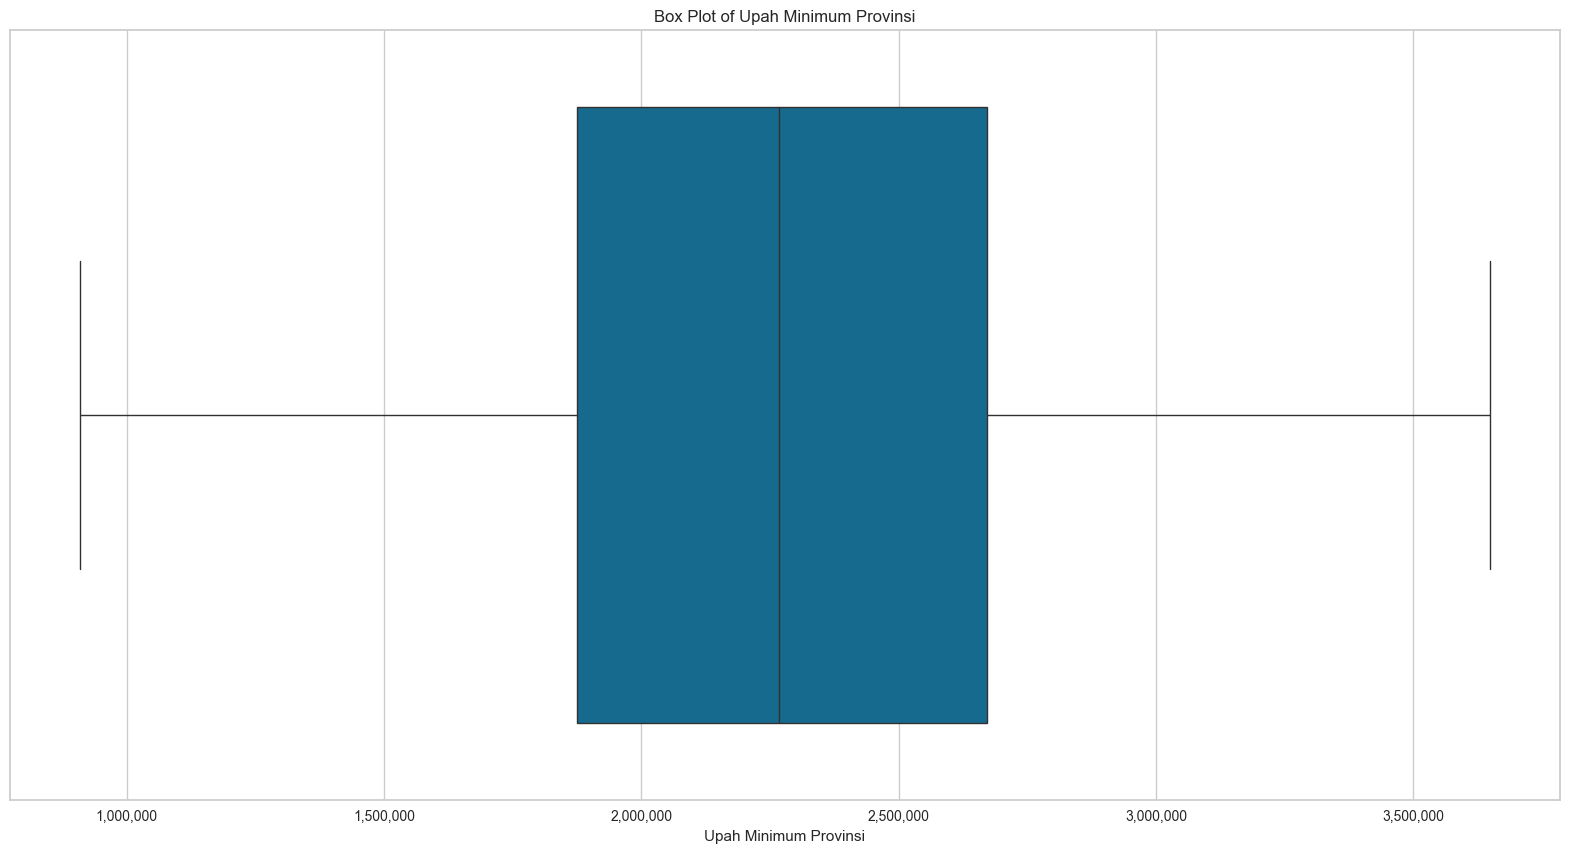

In [119]:
temp_df = replace_outliers_with_median(temp_df, "Upah Minimum Provinsi")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=temp_df["Upah Minimum Provinsi"])
# Ambil nilai ticks dan ubah ke format angka biasa
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
plt.title(f'Box Plot of {"Upah Minimum Provinsi"}')
plt.show()

#### Pengeluaran - Outliers

In [121]:
outlier_count = count_outliers_iqr(temp_df, "Pengeluaran")
print(f"Jumlah outlier di 'Pengeluaran': {outlier_count}")

Jumlah outlier di 'Pengeluaran': 126


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/3176180230.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


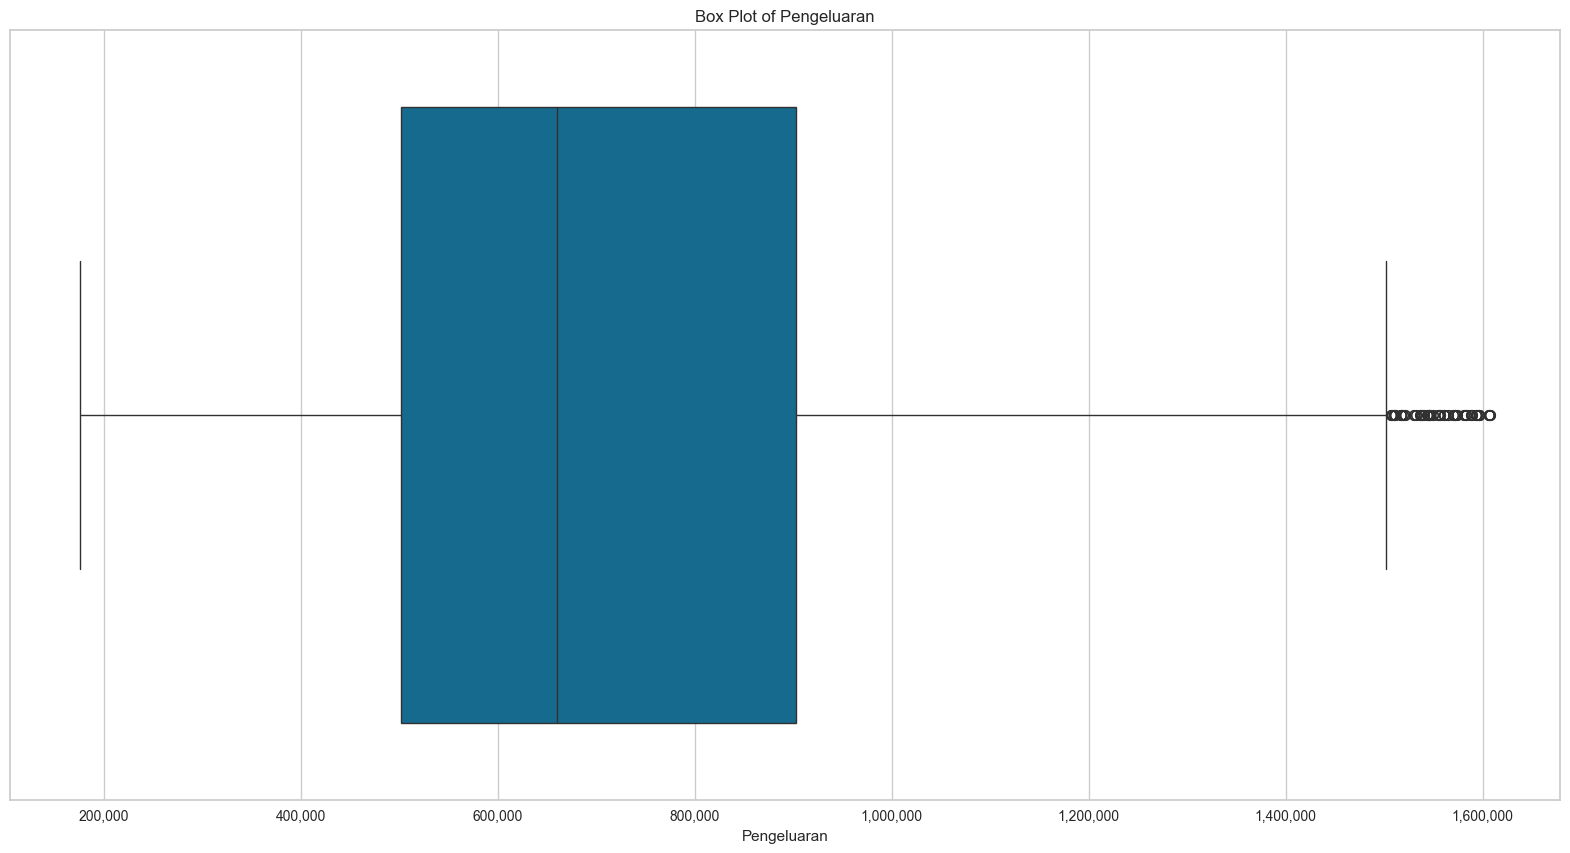

In [122]:
temp_df = replace_outliers_with_median(temp_df, "Pengeluaran")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=temp_df["Pengeluaran"])
# Ambil nilai ticks dan ubah ke format angka biasa
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
plt.title(f'Box Plot of {"Pengeluaran"}')
plt.show()

In [123]:
outlier_count = count_outliers_iqr(temp_df, "Pengeluaran")
print(f"Jumlah outlier di 'Pengeluaran': {outlier_count}")

Jumlah outlier di 'Pengeluaran': 86


Ternyata masih terdapat 86 data outliers. Ada kemungkinan karena lebar data yang terlalu besar atau data tidak terdistribusi normal, jadi metode agregasi median tidak efektif. Lebih baik dihapus saja.

In [136]:
temp_df = remove_outliers_iqr(temp_df, 'Pengeluaran')

In [137]:
outlier_count = count_outliers_iqr(temp_df, "Pengeluaran")
print(f"Jumlah outlier di 'Pengeluaran': {outlier_count}")

Jumlah outlier di 'Pengeluaran': 0


#### Upah Rata Rata - Outliers

In [138]:
outlier_count = count_outliers_iqr(temp_df, "Upah_Rata_rata")
print(f"Jumlah outlier di 'Upah_Rata_rata': {outlier_count}")

Jumlah outlier di 'Upah_Rata_rata': 146


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/583100010.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


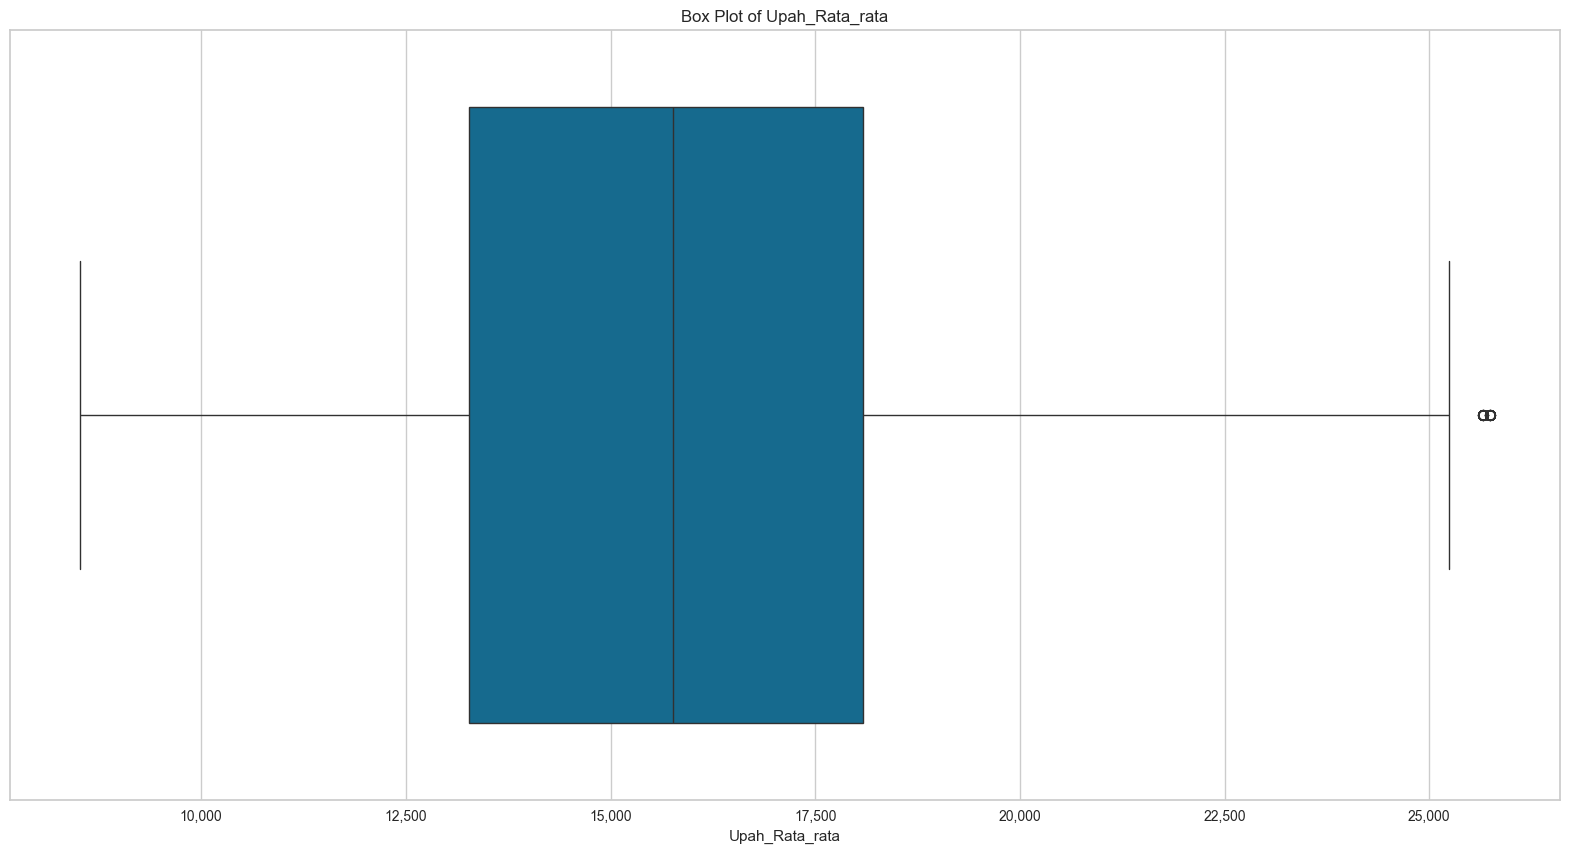

In [139]:
temp_df = replace_outliers_with_median(temp_df, "Upah_Rata_rata")
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x=temp_df["Upah_Rata_rata"])
# Ambil nilai ticks dan ubah ke format angka biasa
xticks = ax.get_xticks()
ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
plt.title(f'Box Plot of {"Upah_Rata_rata"}')
plt.show()

In [140]:
outlier_count = count_outliers_iqr(temp_df, "Upah_Rata_rata")
print(f"Jumlah outlier di 'Upah_Rata_rata': {outlier_count}")

Jumlah outlier di 'Upah_Rata_rata': 34


In [142]:
temp_df = remove_outliers_iqr(temp_df, 'Upah_Rata_rata')
outlier_count = count_outliers_iqr(temp_df, "Upah_Rata_rata")
print(f"Jumlah outlier di 'Upah_Rata_rata': {outlier_count}")

Jumlah outlier di 'Upah_Rata_rata': 0


/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


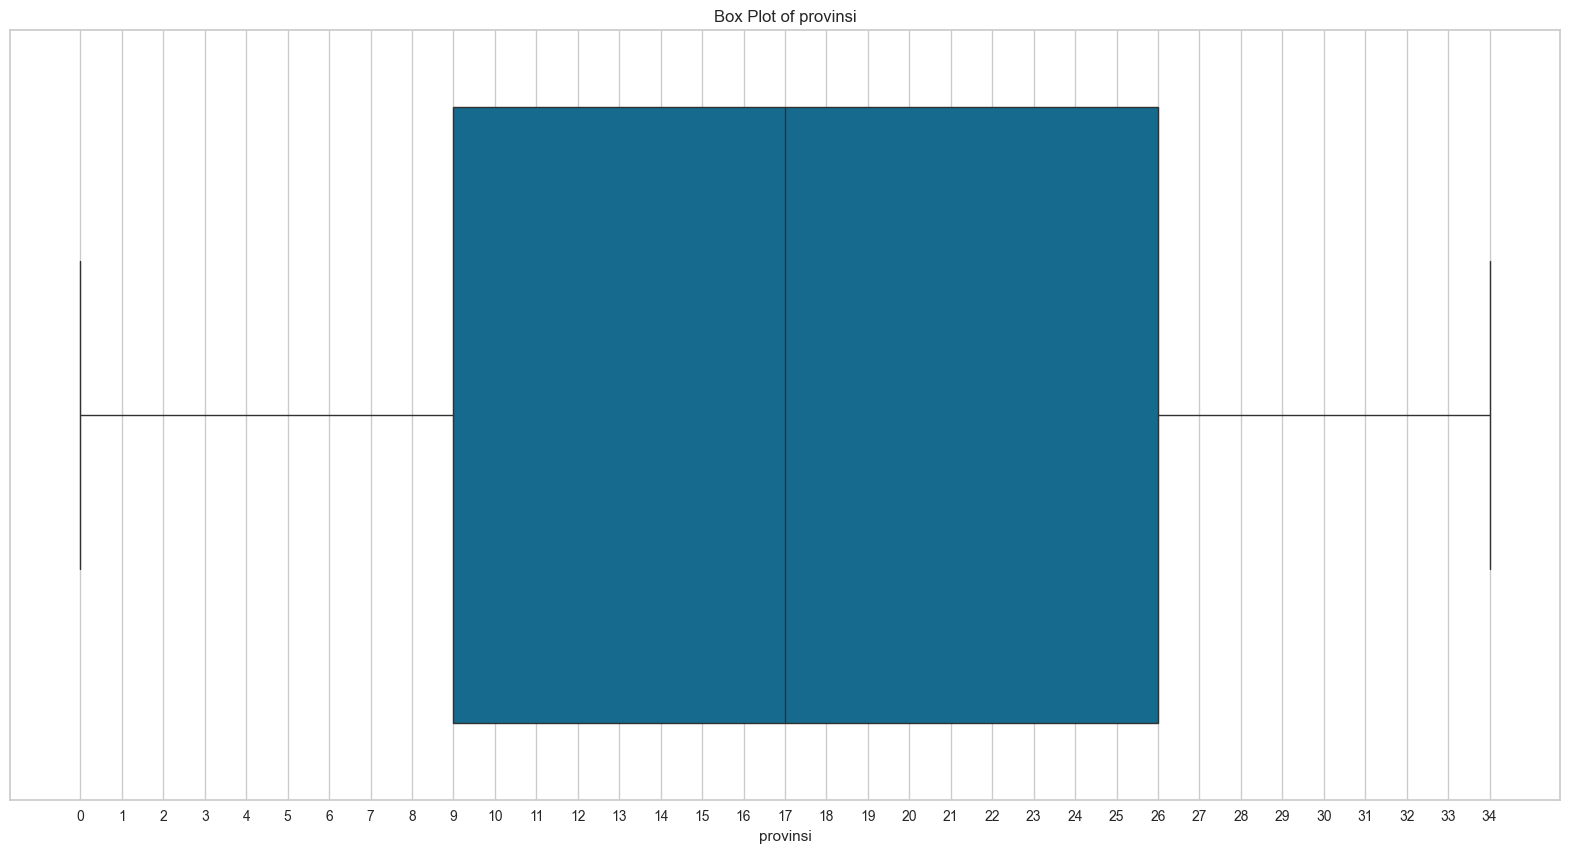

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


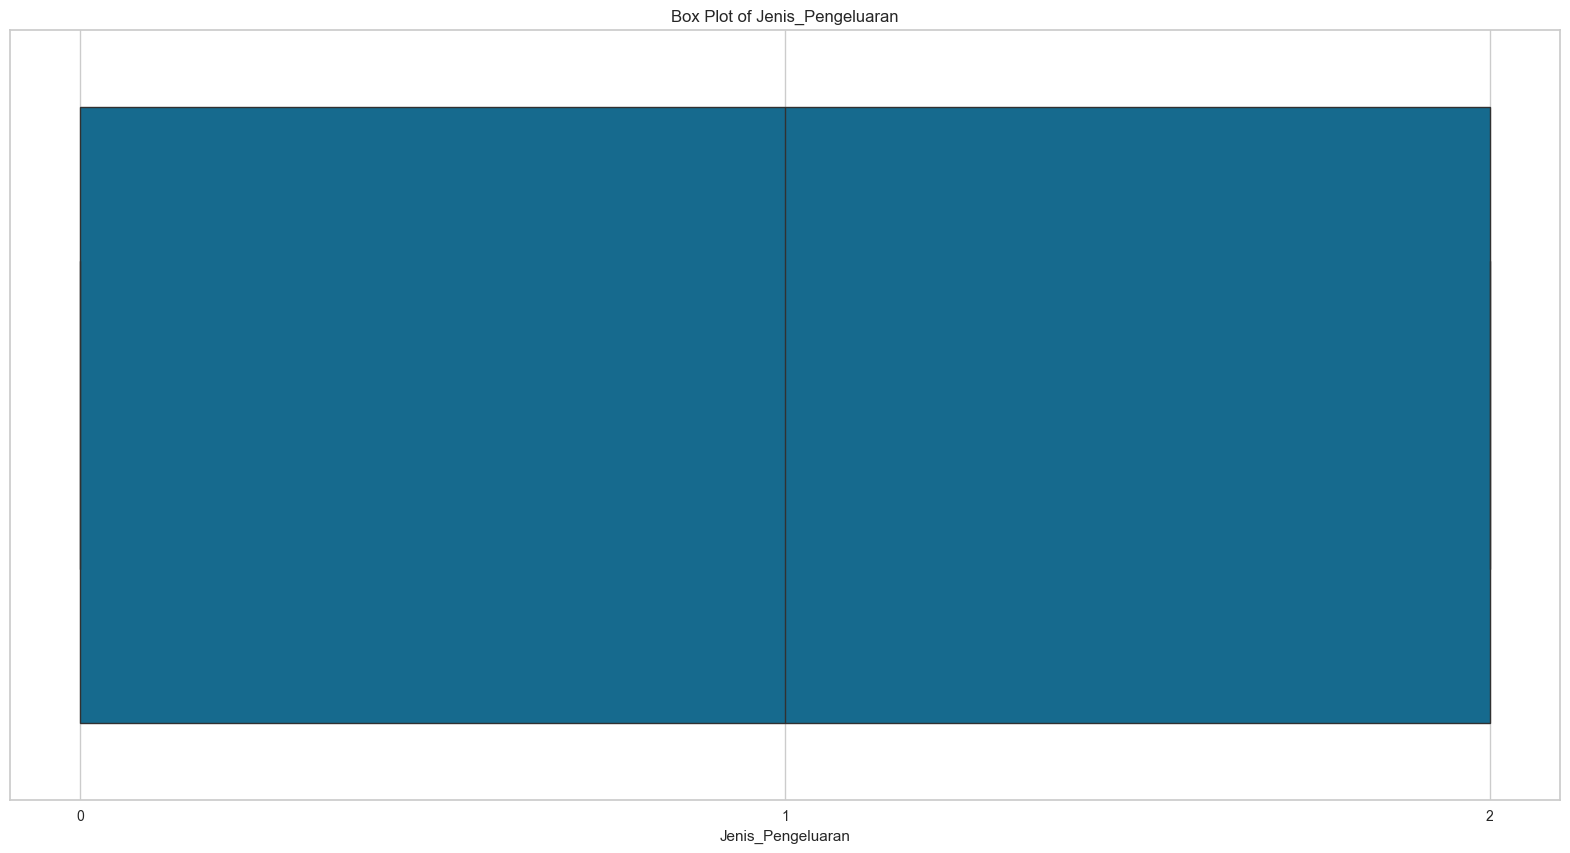

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


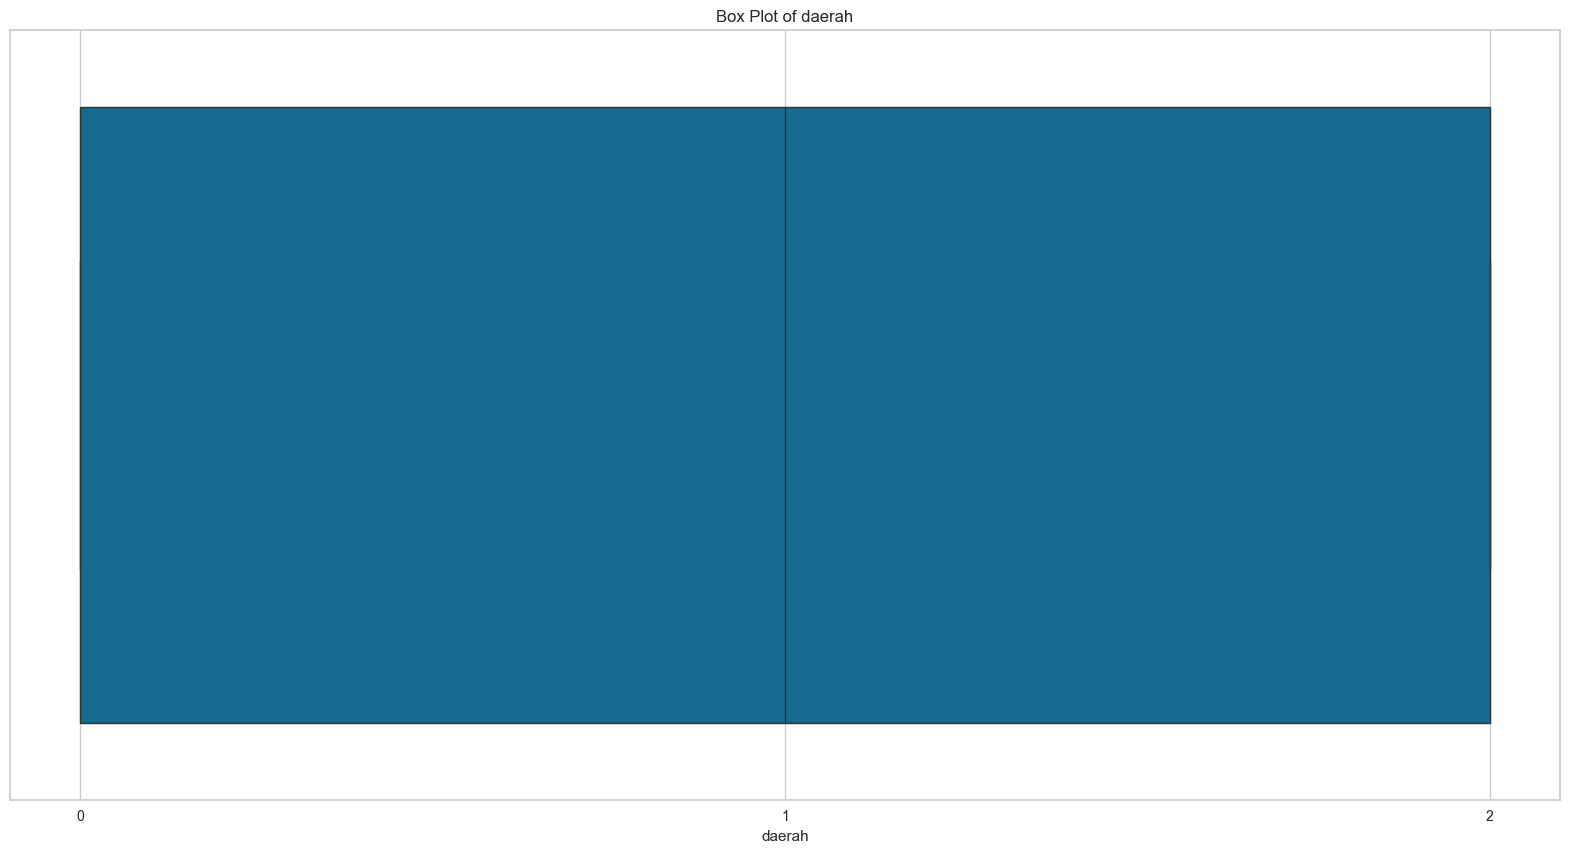

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


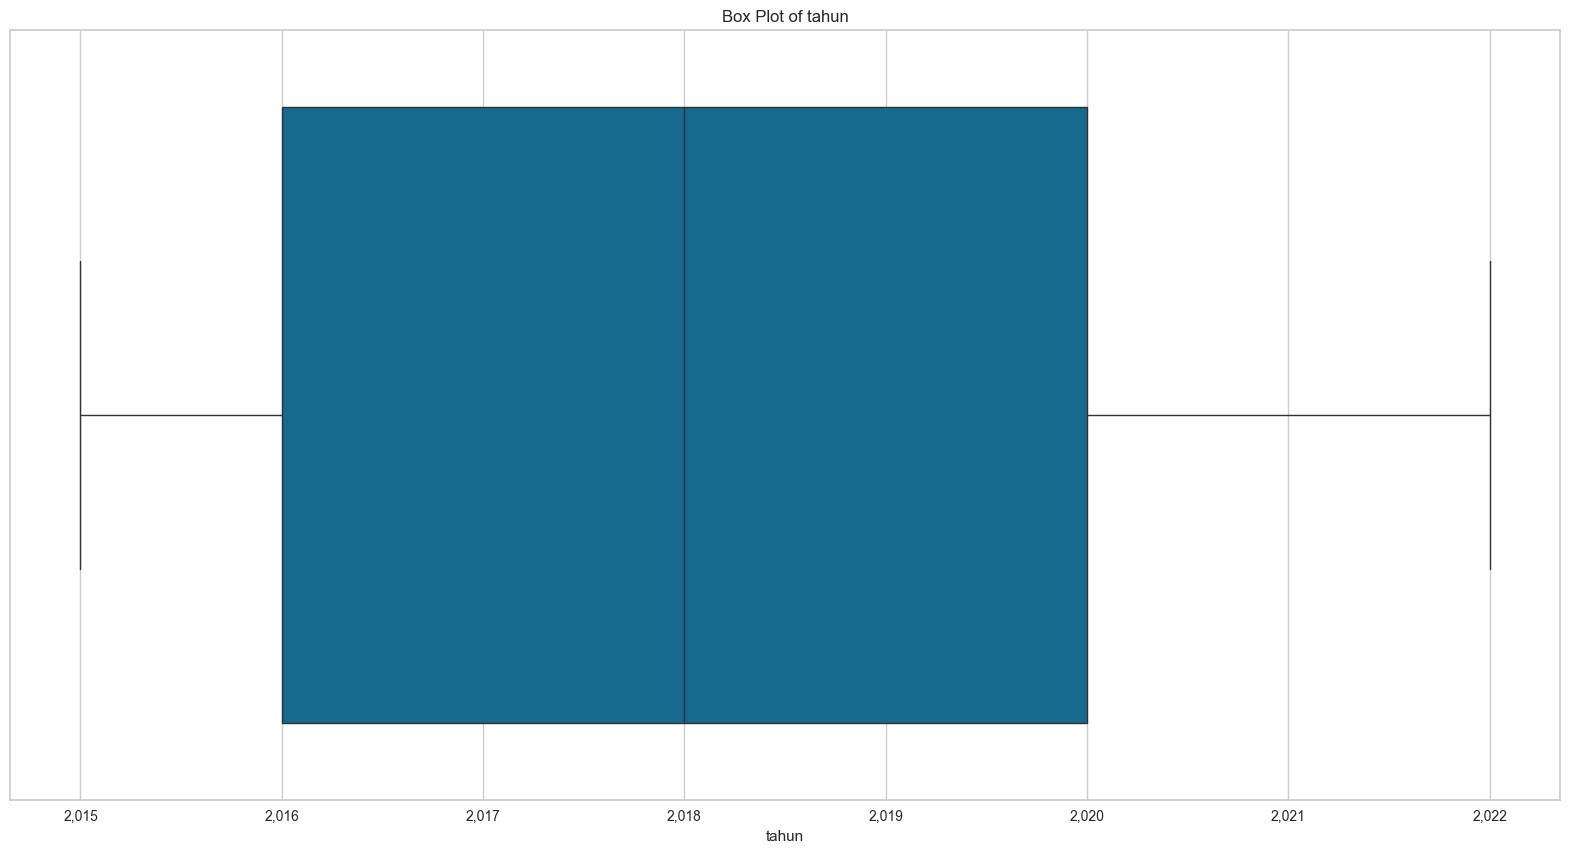

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


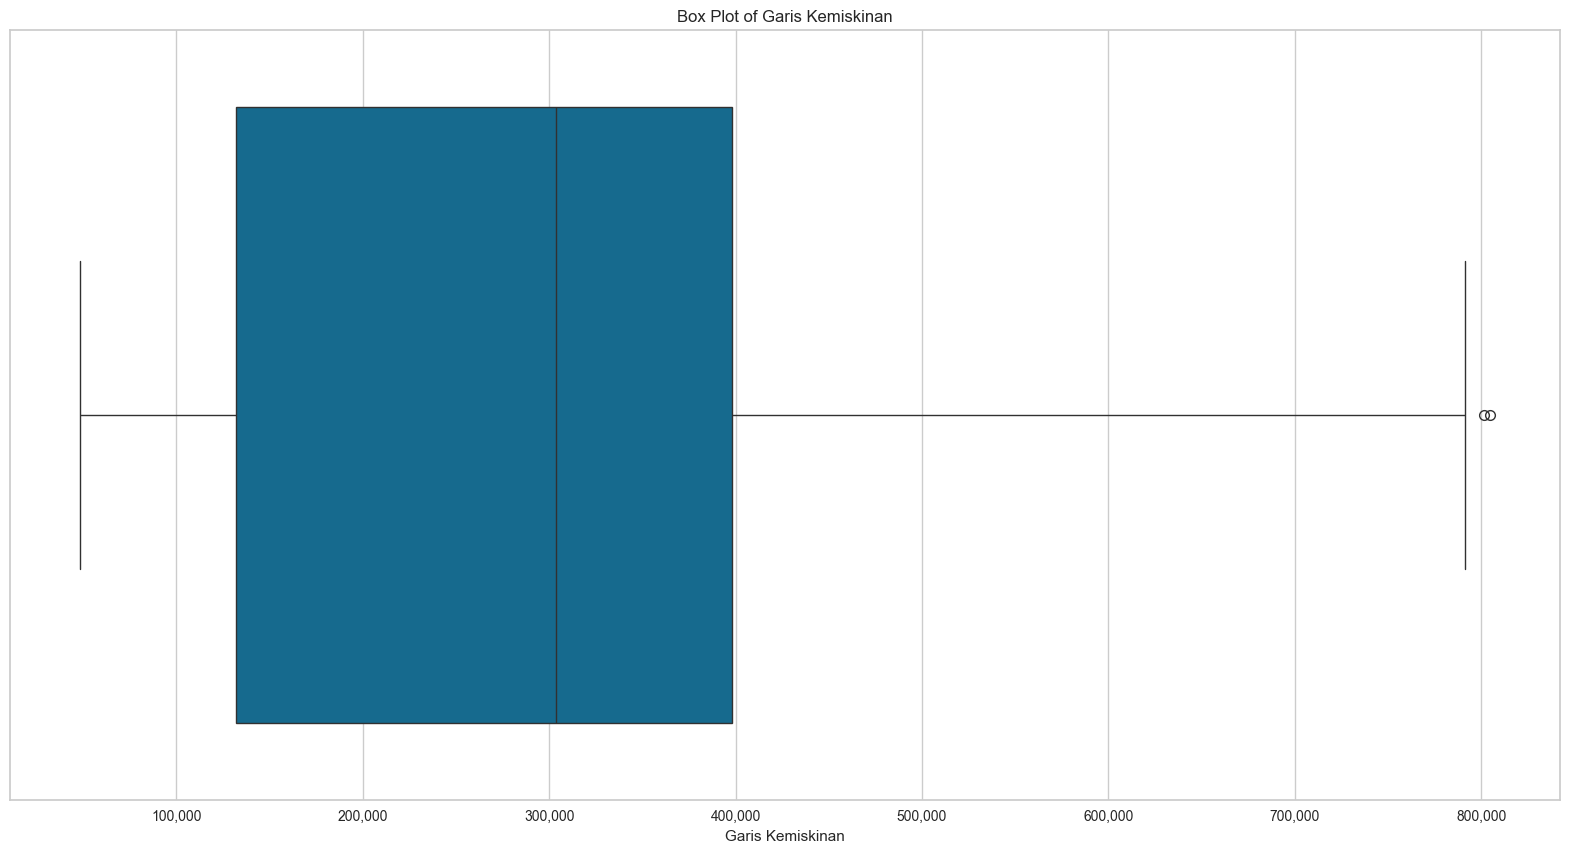

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


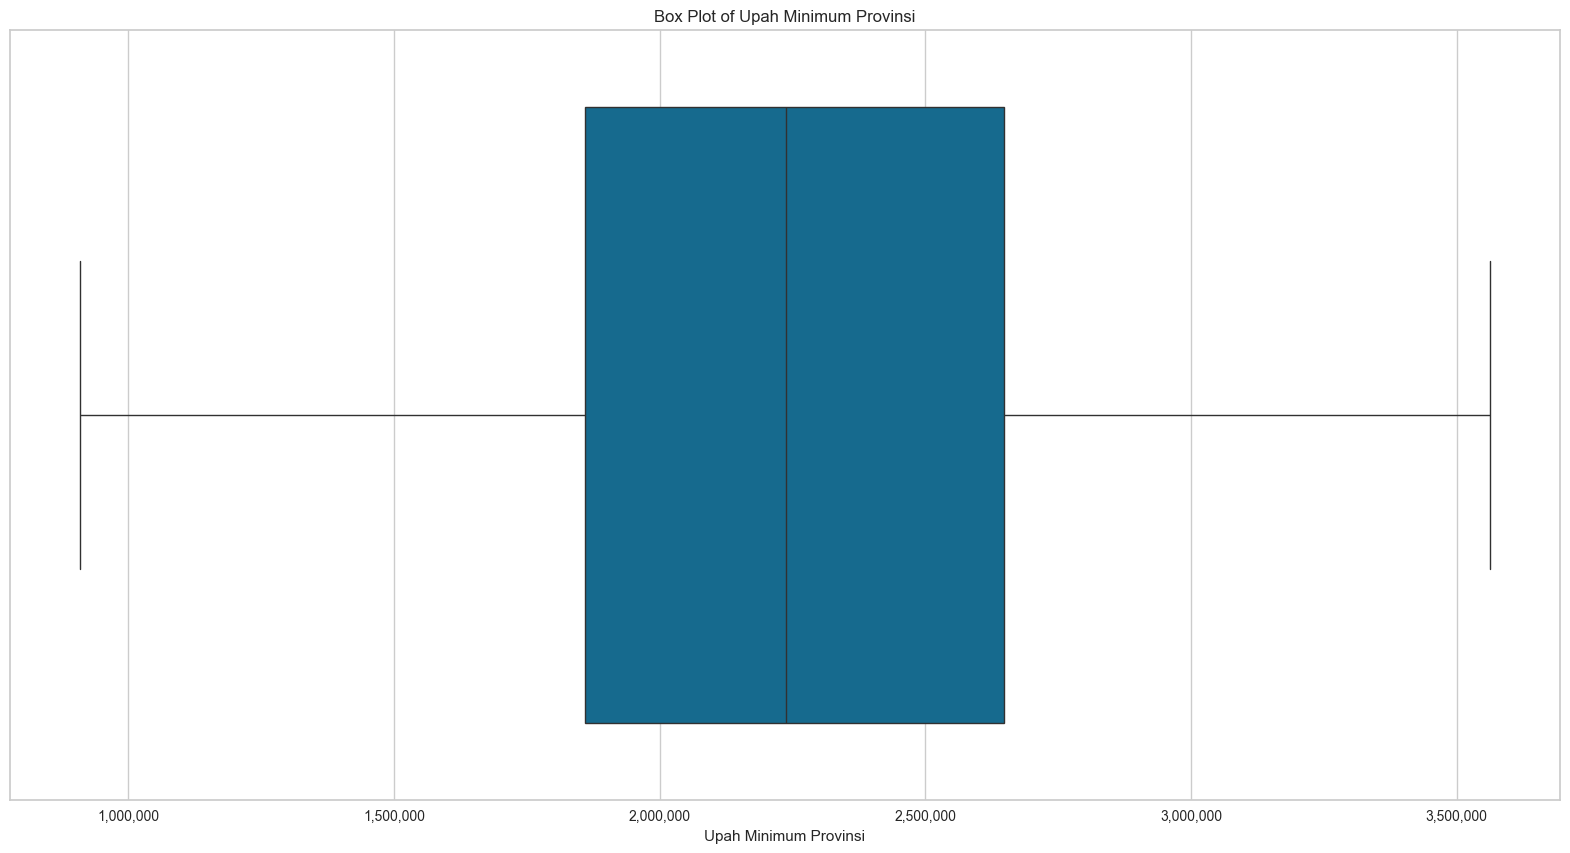

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


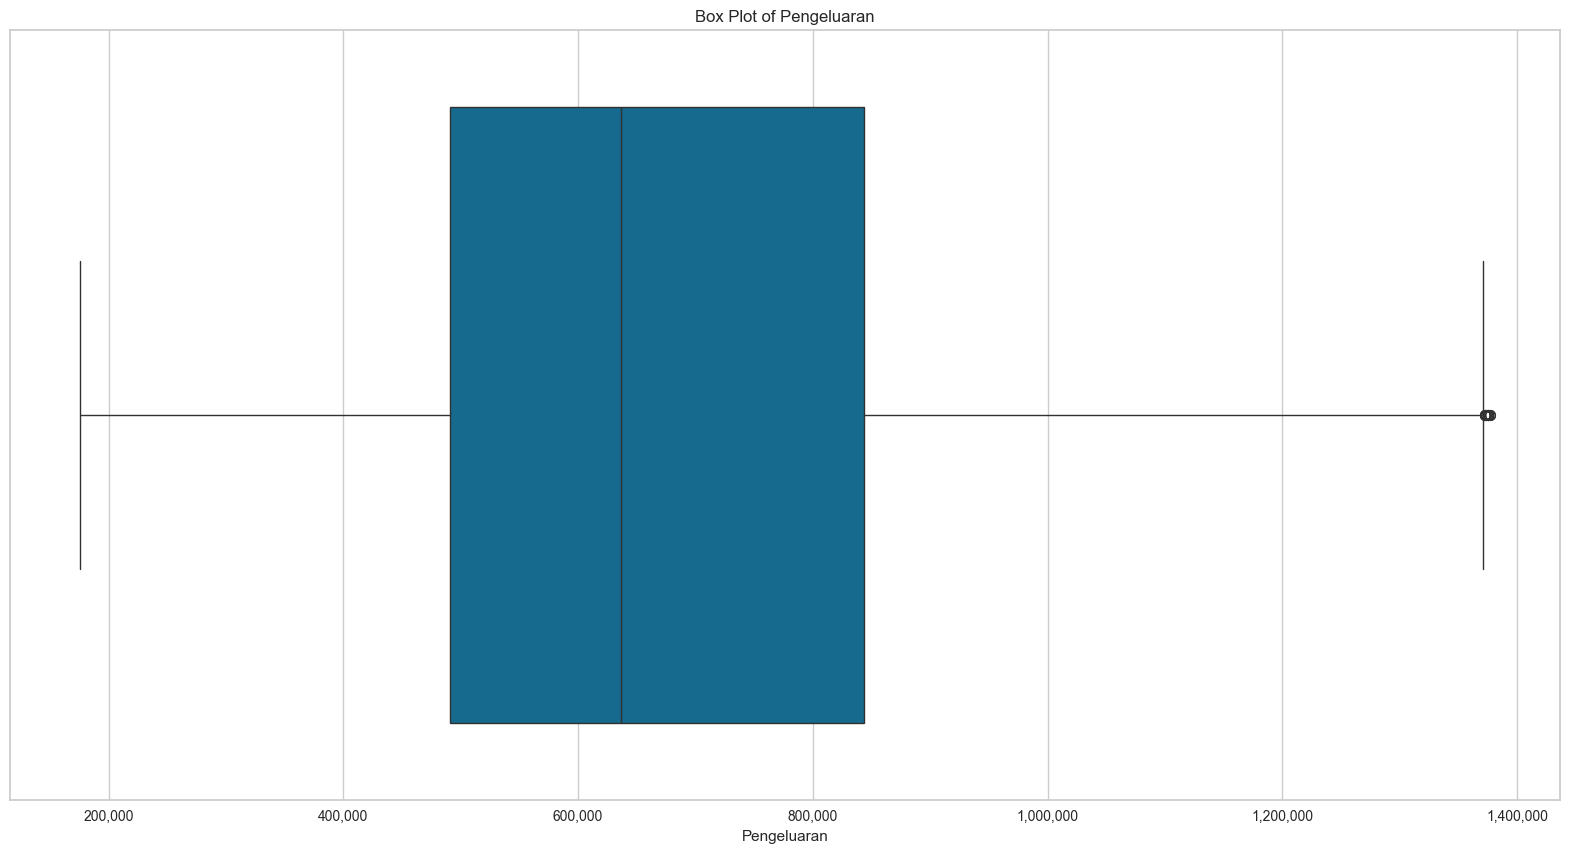

/var/folders/rb/p4tmdxhn16jb2md3cxyqr5dr0000gn/T/ipykernel_40008/1232902318.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])


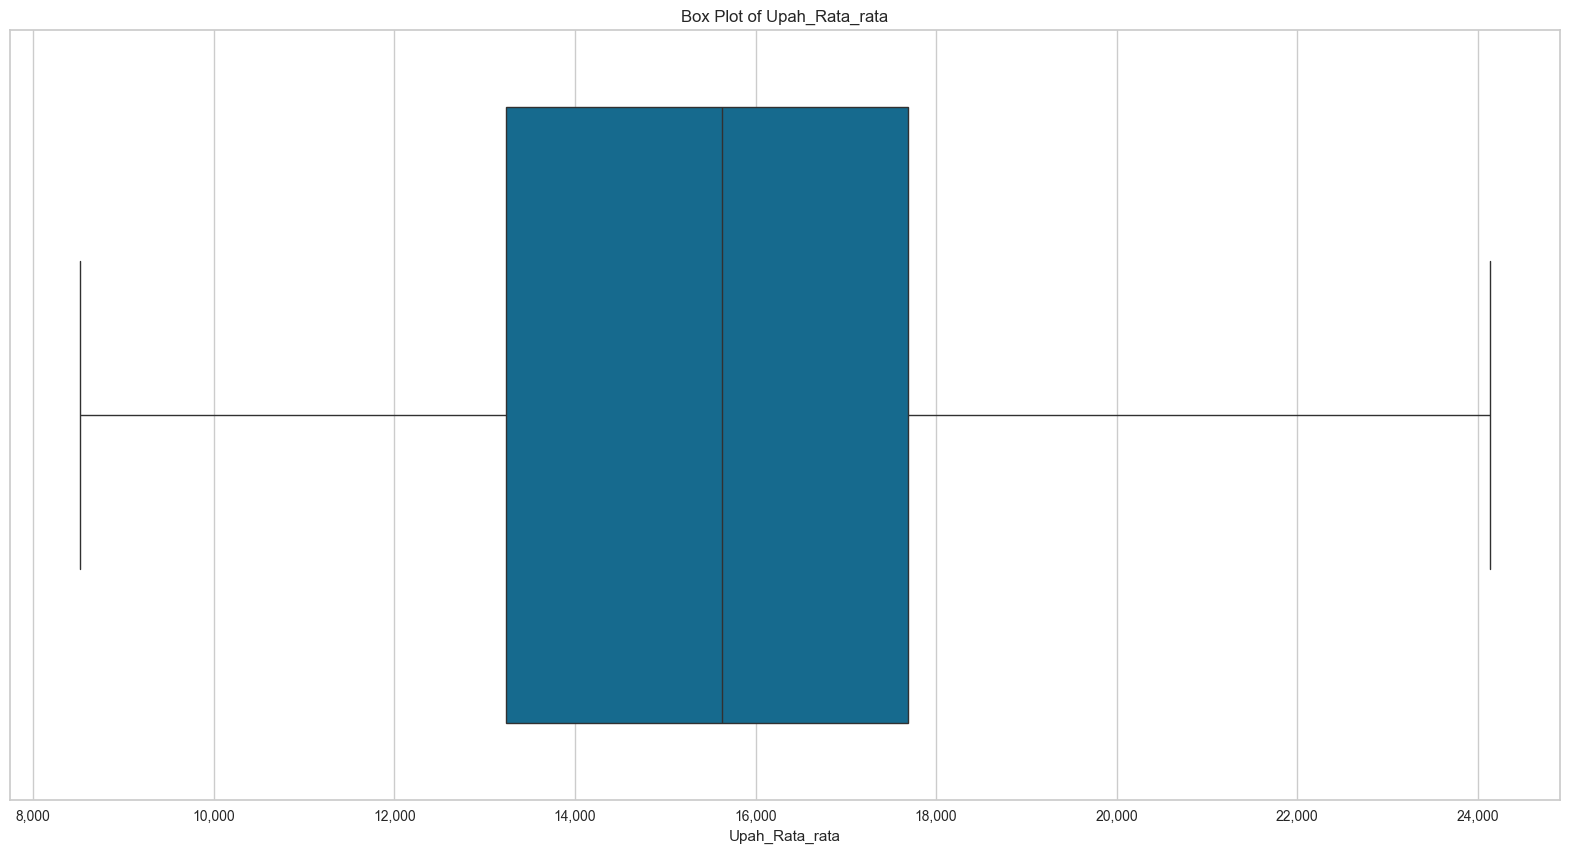

In [143]:
for feature in temp_df:
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x=temp_df[feature])
    # Ambil nilai ticks dan ubah ke format angka biasa
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(tick):,}" for tick in xticks])
    plt.title(f'Box Plot of {feature}')
    plt.show()

### 5. Feature Scaling

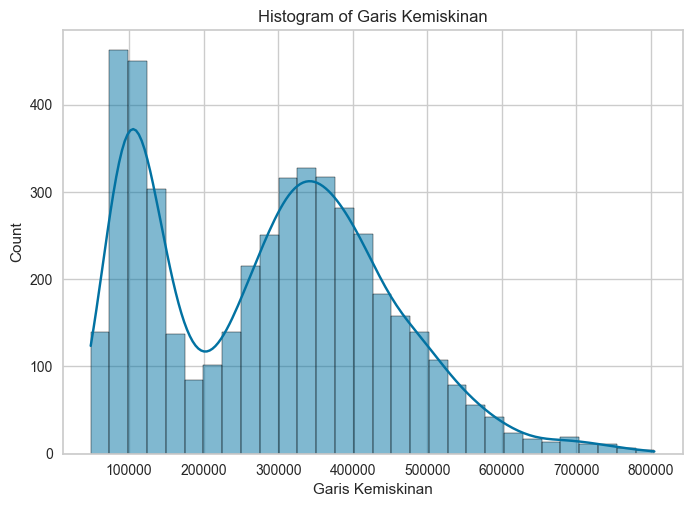

In [144]:
sns.histplot(temp_df['Garis Kemiskinan'], bins=30, kde=True)
plt.title('Histogram of Garis Kemiskinan')
plt.show()

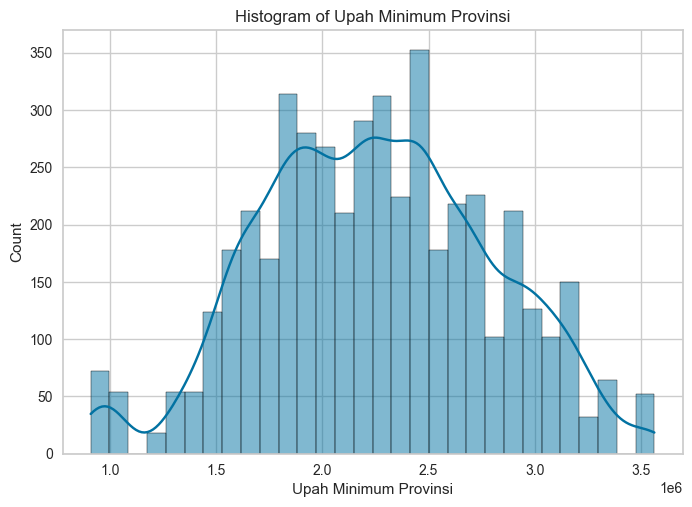

In [145]:
sns.histplot(temp_df['Upah Minimum Provinsi'], bins=30, kde=True)
plt.title('Histogram of Upah Minimum Provinsi')
plt.show()

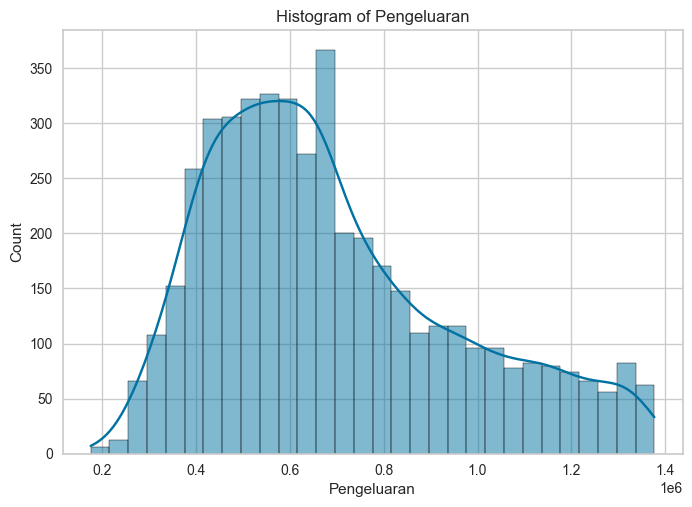

In [146]:
sns.histplot(temp_df['Pengeluaran'], bins=30, kde=True)
plt.title('Histogram of Pengeluaran')
plt.show()

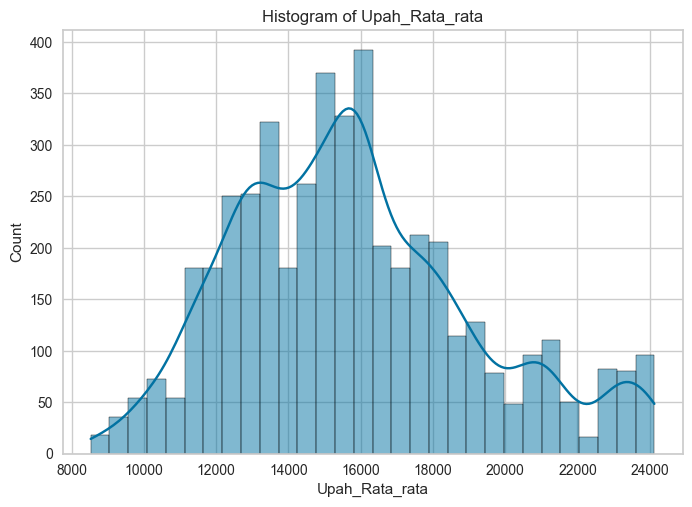

In [147]:
sns.histplot(temp_df['Upah_Rata_rata'], bins=30, kde=True)
plt.title('Histogram of Upah_Rata_rata')
plt.show()

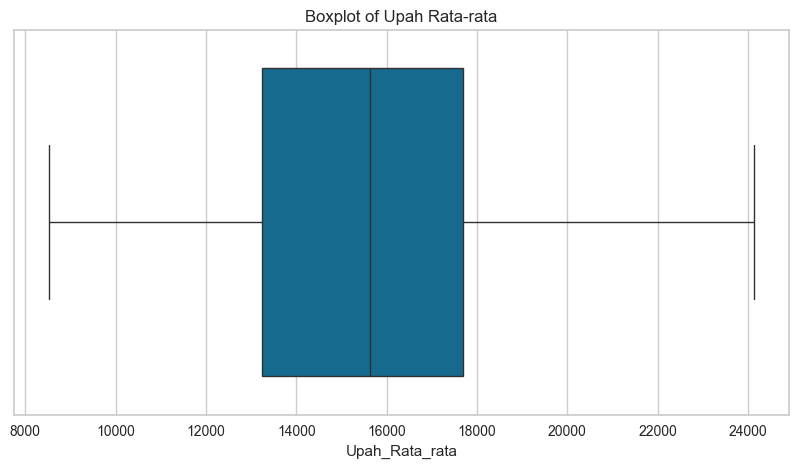

In [148]:
plt.figure(figsize=(10,5))
sns.boxplot(x=temp_df["Upah_Rata_rata"])
plt.title("Boxplot of Upah Rata-rata")
plt.show()

Saya tidak akan melakukan standarisasi karena data masih dibutuhkan dalam proses clustering dan terlihat cenderung terdisitrbusi normal ditambah outliersnya sudah diatasi, sehingga kemungkinan besar, lonjakan tersebut merupakan bagian dari data.

In [149]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom yang akan distandarisasi
columns_to_scale = ["Upah Minimum Provinsi", "Pengeluaran", "Upah_Rata_rata"]

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Transformasi data
temp_df[columns_to_scale] = scaler.fit_transform(temp_df[columns_to_scale])

# Cek hasil setelah standarisasi
print(temp_df.head())

   provinsi Jenis_Pengeluaran              daerah  tahun  Garis Kemiskinan  \
77     ACEH           MAKANAN           PERDESAAN   2015          297479.0   
78     ACEH           MAKANAN           PERDESAAN   2015          306737.0   
79     ACEH           MAKANAN  PERDESAANPERKOTAAN   2015          296406.0   
80     ACEH           MAKANAN  PERDESAANPERKOTAAN   2015          305428.0   
81     ACEH           MAKANAN           PERKOTAAN   2015          293697.0   

    Upah Minimum Provinsi  Pengeluaran  Upah_Rata_rata  
77              -0.641619    -1.112546       -1.359862  
78              -0.641619    -1.112546       -1.359862  
79              -0.641619    -1.036426       -1.359862  
80              -0.641619    -1.036426       -1.359862  
81              -0.641619    -0.844410       -1.359862  


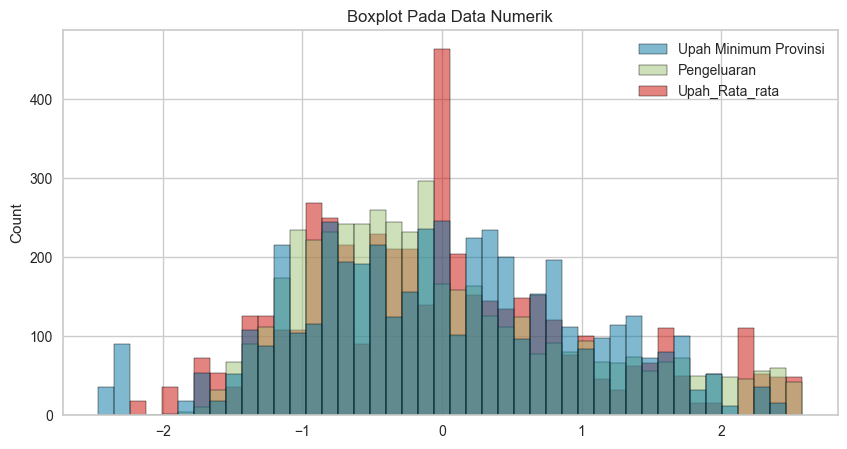

In [150]:
plt.figure(figsize=(10, 5))
sns.histplot(data=temp_df[columns_to_scale])
plt.title("Boxplot Pada Data Numerik")
plt.show()

### 6. Lakukan Encoder
Pada kolom Provinsi, Jenis_Pengeluaran, dan daerah akan diproses menjadi nilai numerik. Untuk Jenis_Pengeluaran dan daerah sendiri akan dilakukan OneHotEncoding karena jumlah kategori yang sedikit dan tidak memiliki urutan didalamnya, sedangkan untuk Provinsi karena memiliki 35 nilai maka diperlukan pendekatan yang lain, yaitu Frequency Encoding. Sebuah pendekatan dimana mengubah nilai karakter berdasarkan jumlah kemunculannya.

#### One Hot Encoding

In [151]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4648 entries, 77 to 7734
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   provinsi               4648 non-null   object 
 1   Jenis_Pengeluaran      4648 non-null   object 
 2   daerah                 4648 non-null   object 
 3   tahun                  4648 non-null   int64  
 4   Garis Kemiskinan       4648 non-null   float64
 5   Upah Minimum Provinsi  4648 non-null   float64
 6   Pengeluaran            4648 non-null   float64
 7   Upah_Rata_rata         4648 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 326.8+ KB


In [152]:
ShowUnique(temp_df)

provinsi : ACEH, BALI, BANTEN, BENGKULU, DI YOGYAKARTA, DKI JAKARTA, GORONTALO, INDONESIA, JAMBI, JAWA BARAT, JAWA TENGAH, JAWA TIMUR, KALIMANTAN BARAT, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN TIMUR, KALIMANTAN UTARA, KEP. BANGKA BELITUNG, KEP. RIAU, LAMPUNG, MALUKU, MALUKU UTARA, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, PAPUA, PAPUA BARAT, RIAU, SULAWESI BARAT, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI TENGGARA, SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELATAN, SUMATERA UTARA

Jenis_Pengeluaran : MAKANAN, NONMAKANAN, TOTAL

daerah : PERDESAAN, PERDESAANPERKOTAAN, PERKOTAAN

tahun : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

Garis Kemiskinan : 297479.0, 306737.0, 296406.0, 305428.0, 293697.0, 302128.0, 84638.0, 87682.0, 93744.0, 96344.0, 116717.0, 118196.0, 382117.0, 394419.0, 390150.0, 401772.0, 410414.0, 420324.0, 315697.0, 324854.0, 312801.0, 323548.0, 306243.0, 319768.0, 88288.0, 90972.0, 98155.0, 101217.0, 121727.0, 125719.0, 403985.0, 415826.0, 410956.0, 424765.

In [153]:
from sklearn.preprocessing import OneHotEncoder

temp_ohe = temp_df
# Inisialisasi encoder
ohe = OneHotEncoder(drop=None, sparse_output=False)

# Pilih kolom yang ingin diencode
categorical_cols = ["Jenis_Pengeluaran", "daerah"]

# Transformasi data menjadi array
encoded_array = ohe.fit_transform(temp_ohe[categorical_cols])

# Konversi ke DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols))

# Gabungkan dengan dataframe asli (tanpa kolom yang diencode)
temp_ohe = temp_ohe.drop(columns=categorical_cols).reset_index(drop=True)
temp_ohe = pd.concat([temp_ohe, encoded_df], axis=1)

print(temp_ohe.head())

  provinsi  tahun  Garis Kemiskinan  Upah Minimum Provinsi  Pengeluaran  \
0     ACEH   2015          297479.0              -0.641619    -1.112546   
1     ACEH   2015          306737.0              -0.641619    -1.112546   
2     ACEH   2015          296406.0              -0.641619    -1.036426   
3     ACEH   2015          305428.0              -0.641619    -1.036426   
4     ACEH   2015          293697.0              -0.641619    -0.844410   

   Upah_Rata_rata  Jenis_Pengeluaran_MAKANAN  Jenis_Pengeluaran_NONMAKANAN  \
0       -1.359862                        1.0                           0.0   
1       -1.359862                        1.0                           0.0   
2       -1.359862                        1.0                           0.0   
3       -1.359862                        1.0                           0.0   
4       -1.359862                        1.0                           0.0   

   Jenis_Pengeluaran_TOTAL  daerah_PERDESAAN  daerah_PERDESAANPERKOTAAN  \
0    

In [154]:
ShowUnique(temp_ohe)

provinsi : ACEH, BALI, BANTEN, BENGKULU, DI YOGYAKARTA, DKI JAKARTA, GORONTALO, INDONESIA, JAMBI, JAWA BARAT, JAWA TENGAH, JAWA TIMUR, KALIMANTAN BARAT, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN TIMUR, KALIMANTAN UTARA, KEP. BANGKA BELITUNG, KEP. RIAU, LAMPUNG, MALUKU, MALUKU UTARA, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, PAPUA, PAPUA BARAT, RIAU, SULAWESI BARAT, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI TENGGARA, SULAWESI UTARA, SUMATERA BARAT, SUMATERA SELATAN, SUMATERA UTARA

tahun : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

Garis Kemiskinan : 297479.0, 306737.0, 296406.0, 305428.0, 293697.0, 302128.0, 84638.0, 87682.0, 93744.0, 96344.0, 116717.0, 118196.0, 382117.0, 394419.0, 390150.0, 401772.0, 410414.0, 420324.0, 315697.0, 324854.0, 312801.0, 323548.0, 306243.0, 319768.0, 88288.0, 90972.0, 98155.0, 101217.0, 121727.0, 125719.0, 403985.0, 415826.0, 410956.0, 424765.0, 427970.0, 445488.0, 331267.0, 346070.0, 330958.0, 346552.0, 330153.0, 347811.0, 94463.0, 96799.0

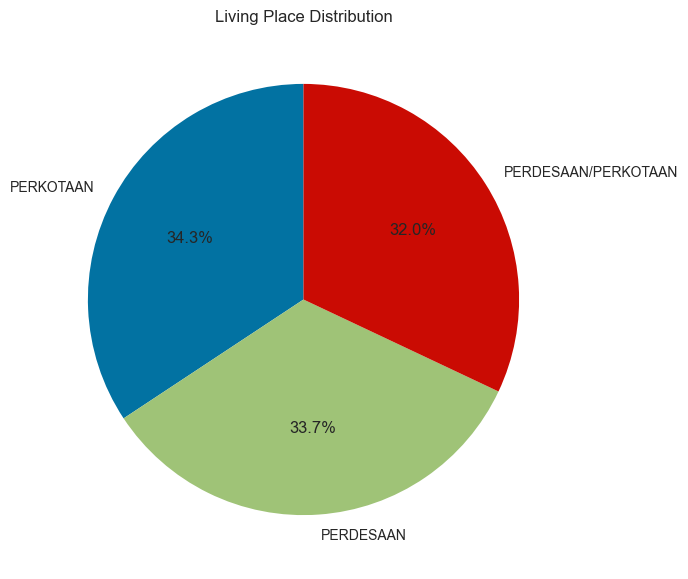

In [155]:
plt.figure(figsize=(7, 7))
plt.pie(temp_df['daerah'].value_counts(), labels=["PERKOTAAN", "PERDESAAN", "PERDESAAN/PERKOTAAN"], autopct='%1.1f%%', startangle=90)
plt.title('Living Place Distribution')
plt.show()

In [156]:
temp_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   provinsi                      4648 non-null   object 
 1   tahun                         4648 non-null   int64  
 2   Garis Kemiskinan              4648 non-null   float64
 3   Upah Minimum Provinsi         4648 non-null   float64
 4   Pengeluaran                   4648 non-null   float64
 5   Upah_Rata_rata                4648 non-null   float64
 6   Jenis_Pengeluaran_MAKANAN     4648 non-null   float64
 7   Jenis_Pengeluaran_NONMAKANAN  4648 non-null   float64
 8   Jenis_Pengeluaran_TOTAL       4648 non-null   float64
 9   daerah_PERDESAAN              4648 non-null   float64
 10  daerah_PERDESAANPERKOTAAN     4648 non-null   float64
 11  daerah_PERKOTAAN              4648 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 435.9+ KB


Untuk Kolom Provinsi, dapat kita lakukan dengan cara penyederhanaan cluster, seperti membaginya menjadi bagian lebih sederhana, yaitu Indonesia Timur, Indonesia tengah, Indonesia Barat, dan Indonesia. Hal ini dapat mengatasi Curse of Dimensionality. Adapula detail pembagian sebagai berikut: <br>
- Indonesia Timur : MALUKU, MALUKU UTARA, PAPUA, PAPUA BARAT
- Indonesia Tengah : KALIMANTAN BARAT, KALIMANTAN SELATAN, KALIMANTAN TENGAH, KALIMANTAN TIMUR, KALIMANTAN UTARA, BALI, NUSA TENGGARA BARAT, NUSA TENGGARA TIMUR, GORONTALO, SULAWESI BARAT, SULAWESI SELATAN, SULAWESI TENGAH, SULAWESI TENGGARA, SULAWESI UTARA
- Indonesia Barat : ACEH, BENGKULU, JAMBI, LAMPUNG, RIAU, SUMATERA BARAT, SUMATERA SELATAN, SUMATERA UTARA, KEP. BANGKA BELITUNG, KEP. RIAU, BANTEN, DKI JAKARTA, JAWA BARAT, JAWA TENGAH, JAWA TIMUR, DI YOGYAKARTA
- Indonesia

In [157]:
temp_ohe_final = temp_ohe
# Definisikan pembagian wilayah
indonesia_timur = ["MALUKU", "MALUKU UTARA", "PAPUA", "PAPUA BARAT"]
indonesia_tengah = ["KALIMANTAN BARAT", "KALIMANTAN SELATAN", "KALIMANTAN TENGAH", "KALIMANTAN TIMUR", "KALIMANTAN UTARA", 
                     "BALI", "NUSA TENGGARA BARAT", "NUSA TENGGARA TIMUR", "GORONTALO", 
                     "SULAWESI BARAT", "SULAWESI SELATAN", "SULAWESI TENGAH", "SULAWESI TENGGARA", "SULAWESI UTARA"]
indonesia_barat = ["ACEH", "BENGKULU", "JAMBI", "LAMPUNG", "RIAU", "SUMATERA BARAT", "SUMATERA SELATAN", "SUMATERA UTARA", 
                   "KEP. BANGKA BELITUNG", "KEP. RIAU", "BANTEN", "DKI JAKARTA", "JAWA BARAT", "JAWA TENGAH", "JAWA TIMUR", "DI YOGYAKARTA"]

# Buat fungsi untuk mengkategorikan provinsi
def categorize_province(province):
    if province in indonesia_timur:
        return "Indonesia Timur"
    elif province in indonesia_tengah:
        return "Indonesia Tengah"
    elif province in indonesia_barat:
        return "Indonesia Barat"
    else:
        return "Indonesia"  # Untuk kategori "INDONESIA"

# Terapkan fungsi pada kolom 'provinsi'
temp_ohe_final["provinsi"] = temp_ohe_final["provinsi"].apply(categorize_province)

# Cek hasilnya
print(temp_ohe_final["provinsi"].value_counts())

provinsi
Indonesia Barat     2082
Indonesia Tengah    1924
Indonesia Timur      506
Indonesia            136
Name: count, dtype: int64


In [158]:
# Melakukan One Hot Encoding pada Data Provinsi
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(temp_ohe_final[["provinsi"]])

# Mengonversi ke DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(["provinsi"]))

# Gabungkan dengan Data Awal
df_encoded = pd.concat([temp_ohe_final, encoded_df], axis=1)

# Hasil Akhir
print(df_encoded)

             provinsi  tahun  Garis Kemiskinan  Upah Minimum Provinsi  \
0     Indonesia Barat   2015          297479.0              -0.641619   
1     Indonesia Barat   2015          306737.0              -0.641619   
2     Indonesia Barat   2015          296406.0              -0.641619   
3     Indonesia Barat   2015          305428.0              -0.641619   
4     Indonesia Barat   2015          293697.0              -0.641619   
...               ...    ...               ...                    ...   
4643  Indonesia Barat   2022          563783.0               0.506476   
4644  Indonesia Barat   2022          561004.0               0.506476   
4645  Indonesia Barat   2022          592025.0               0.506476   
4646  Indonesia Barat   2022          583221.0               0.506476   
4647  Indonesia Barat   2022          615227.0               0.506476   

      Pengeluaran  Upah_Rata_rata  Jenis_Pengeluaran_MAKANAN  \
0       -1.112546       -1.359862                        1.

In [159]:
# Melakukan drop pada bagian provinsi
df_encoded = df_encoded.drop(columns=["provinsi"])
df_encoded.head()

,tahun,Garis Kemiskinan,Upah Minimum Provinsi,Pengeluaran,Upah_Rata_rata,Jenis_Pengeluaran_MAKANAN,Jenis_Pengeluaran_NONMAKANAN,Jenis_Pengeluaran_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,provinsi_Indonesia,provinsi_Indonesia Barat,provinsi_Indonesia Tengah,provinsi_Indonesia Timur
0,2015,297479.0,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2015,306737.0,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2015,296406.0,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2015,305428.0,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2015,293697.0,-0.641619,-0.844410,-1.359862,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### 7. Lakukan Analisa Korelasi

Setelah selesai melakukan OneHotEncoding, saatnya melakukan korelasi mapping dan visualisasi data

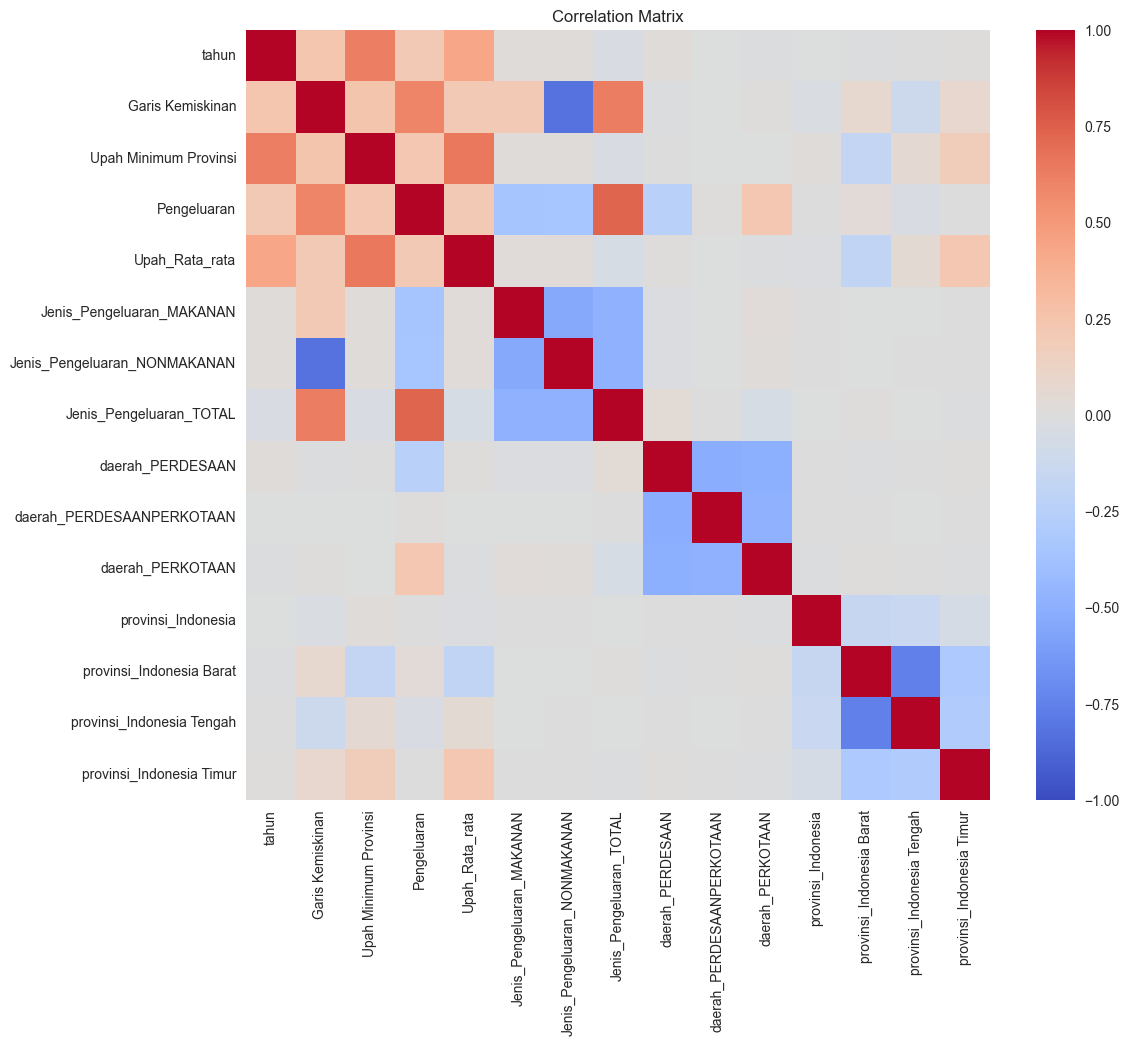

In [160]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Terdapat korelasi positif pada garis kemiskinan dengan tahun, UMP, pengeluaran, jenis pengeluaran, dan korelasi negatif dengan jenis pengeluaran non makanan dan korelasi netral(tidak ada hubungan) antara garis kemiskinan dengan daerah tempat tinggal, terkhusunya seperti desa, atau kota. Akan tetapi, provinsi tempat tinggal memiliki efek pada garis kemiskinan.

### 8. Binning

Proses binning adalah usaha untuk mengubah data numerik kontinu menjadi kategori atau interval diskrit. Hal ini saya lakukan pada kategori Garis Kemiskinan karena hal ini dapat dibagi menjad 3 kategori, yaitu Miskin, Rentan Miskin, dan Tidak Miskin. Ada pula proses yang dilakukan dengan Unsupervised Binning dengan metode Equal-Width Binning karena dataset tidak memiliki target sehingga cara ini dipikir cocok. 

In [161]:
df_binning = df_encoded
# Melakukan Equal-Width Binning pada kolom 'Garis_Kemiskinan'
df_binning['kategori_kemiskinan'] = pd.cut(
    df_binning['Garis Kemiskinan'], 
    bins=3,  # Membagi menjadi 3 kelompok
    labels=['Miskin', 'Rentan Miskin', 'Tidak Miskin']  # Label untuk setiap bin
)

# Menampilkan hasil
print(df_binning[['Garis Kemiskinan', 'kategori_kemiskinan']].head())

   Garis Kemiskinan kategori_kemiskinan
0          297479.0              Miskin
1          306737.0       Rentan Miskin
2          296406.0              Miskin
3          305428.0       Rentan Miskin
4          293697.0              Miskin


### 9. Buat Visualisasi hubungan antar data

In [162]:
df_binning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   tahun                         4648 non-null   int64   
 1   Garis Kemiskinan              4648 non-null   float64 
 2   Upah Minimum Provinsi         4648 non-null   float64 
 3   Pengeluaran                   4648 non-null   float64 
 4   Upah_Rata_rata                4648 non-null   float64 
 5   Jenis_Pengeluaran_MAKANAN     4648 non-null   float64 
 6   Jenis_Pengeluaran_NONMAKANAN  4648 non-null   float64 
 7   Jenis_Pengeluaran_TOTAL       4648 non-null   float64 
 8   daerah_PERDESAAN              4648 non-null   float64 
 9   daerah_PERDESAANPERKOTAAN     4648 non-null   float64 
 10  daerah_PERKOTAAN              4648 non-null   float64 
 11  provinsi_Indonesia            4648 non-null   float64 
 12  provinsi_Indonesia Barat      4648 non-null   fl

In [163]:
df_binning.head()

,tahun,Garis Kemiskinan,Upah Minimum Provinsi,Pengeluaran,Upah_Rata_rata,Jenis_Pengeluaran_MAKANAN,Jenis_Pengeluaran_NONMAKANAN,Jenis_Pengeluaran_TOTAL,daerah_PERDESAAN,daerah_PERDESAANPERKOTAAN,daerah_PERKOTAAN,provinsi_Indonesia,provinsi_Indonesia Barat,provinsi_Indonesia Tengah,provinsi_Indonesia Timur,kategori_kemiskinan
0,2015,297479.0,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Miskin
1,2015,306737.0,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Rentan Miskin
2,2015,296406.0,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Miskin
3,2015,305428.0,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Rentan Miskin
4,2015,293697.0,-0.641619,-0.844410,-1.359862,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Miskin


In [164]:
df_menuju_final = df_binning 
# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Transformasi kategori_kemiskinan menjadi One-Hot Encoding
encoded_kemiskinan = encoder.fit_transform(df_menuju_final[['kategori_kemiskinan']])

# Membuat DataFrame baru dari hasil encoding
encoded_kemiskinan_df = pd.DataFrame(
    encoded_kemiskinan, 
    columns=encoder.get_feature_names_out(['kategori_kemiskinan'])
)

# Menggabungkan kembali dengan dataset asli (tanpa kolom kategori_kemiskinan yang lama)
df_menuju_final = df_menuju_final.drop(columns=['kategori_kemiskinan']).reset_index(drop=True)
df_menuju_final = df_menuju_final.drop(columns=['Garis Kemiskinan']).reset_index(drop=True)
df_menuju_final = pd.concat([df_menuju_final, encoded_kemiskinan_df], axis=1)

# Menampilkan hasil
print(df_menuju_final.head())

   tahun  Upah Minimum Provinsi  Pengeluaran  Upah_Rata_rata  \
0   2015              -0.641619    -1.112546       -1.359862   
1   2015              -0.641619    -1.112546       -1.359862   
2   2015              -0.641619    -1.036426       -1.359862   
3   2015              -0.641619    -1.036426       -1.359862   
4   2015              -0.641619    -0.844410       -1.359862   

   Jenis_Pengeluaran_MAKANAN  Jenis_Pengeluaran_NONMAKANAN  \
0                        1.0                           0.0   
1                        1.0                           0.0   
2                        1.0                           0.0   
3                        1.0                           0.0   
4                        1.0                           0.0   

   Jenis_Pengeluaran_TOTAL  daerah_PERDESAAN  daerah_PERDESAANPERKOTAAN  \
0                      0.0               1.0                        0.0   
1                      0.0               1.0                        0.0   
2                

In [165]:
df_menuju_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4648 entries, 0 to 4647
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   tahun                              4648 non-null   int64  
 1   Upah Minimum Provinsi              4648 non-null   float64
 2   Pengeluaran                        4648 non-null   float64
 3   Upah_Rata_rata                     4648 non-null   float64
 4   Jenis_Pengeluaran_MAKANAN          4648 non-null   float64
 5   Jenis_Pengeluaran_NONMAKANAN       4648 non-null   float64
 6   Jenis_Pengeluaran_TOTAL            4648 non-null   float64
 7   daerah_PERDESAAN                   4648 non-null   float64
 8   daerah_PERDESAANPERKOTAAN          4648 non-null   float64
 9   daerah_PERKOTAAN                   4648 non-null   float64
 10  provinsi_Indonesia                 4648 non-null   float64
 11  provinsi_Indonesia Barat           4648 non-null   float

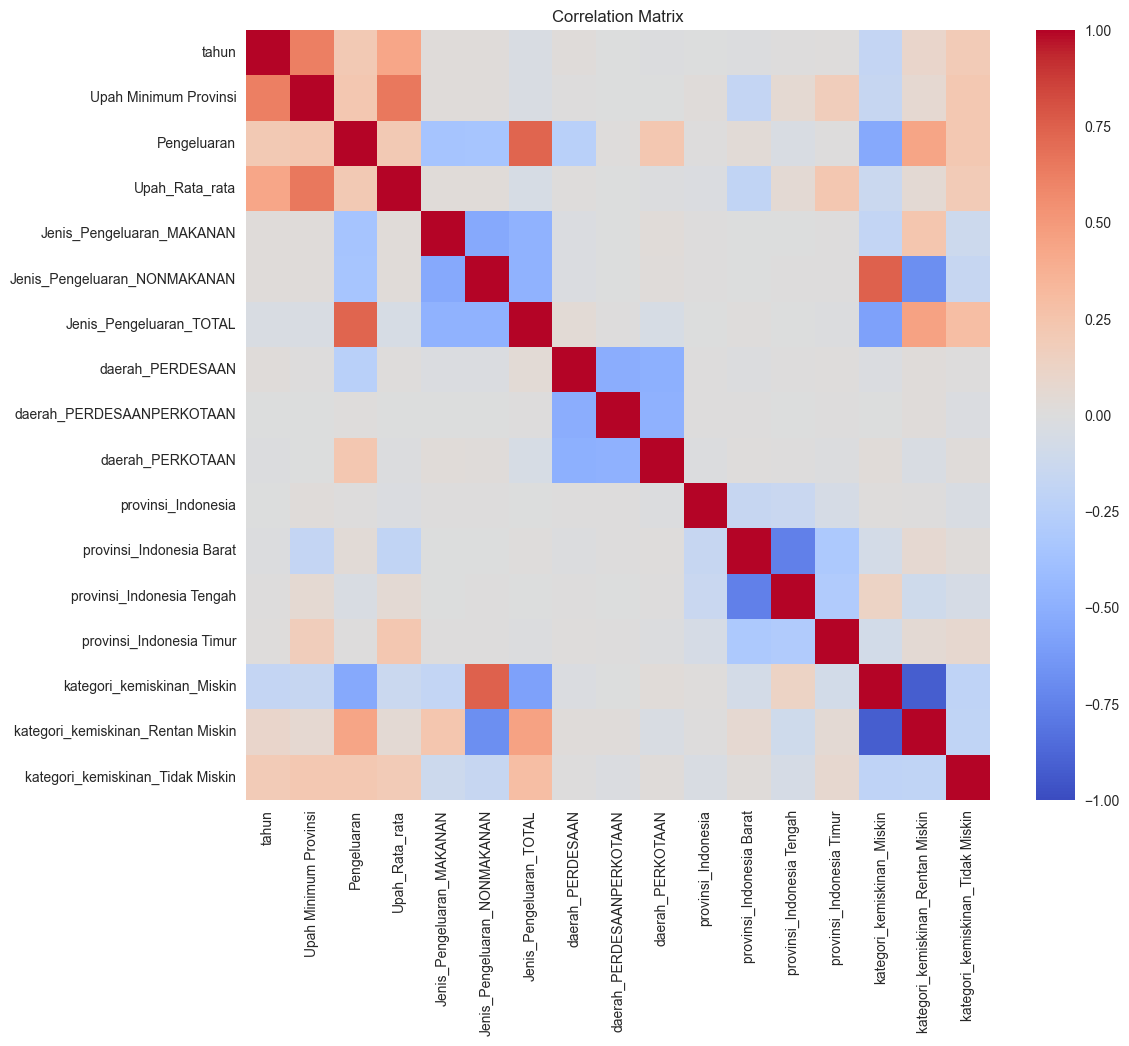

In [166]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_menuju_final.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### Pilih Algoritma

Sebelum  masuk ke pemilihan algoritma, (1)kita perlu membuang kolom tidak penting dalam dataset, yaitu daerah tempat tinggal. Lalu kita perlu (2)menentukan jumlah cluster yang optimal untuk data ini. Kita perlu menggunakan metode Elbow method.

In [167]:
ShowUnique(df_menuju_final)

tahun : 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022

Upah Minimum Provinsi : -0.6416186869655608, -0.23870388463886494, 0.4647835162198741, 0.8335842506150191, 1.233382686736076, 1.6911031221975625, 1.6937382034448158, -1.1557785428152083, -0.8120046262561178, -0.5370138906653938, -0.2227403448505711, 0.09223761036694643, 0.45371949418801977, 0.49607810253697415, -1.1948197885582783, -0.8555231129147449, -0.5841226524733577, -0.2739520148286809, 0.03695622428478618, 0.39286184100180493, 0.4670018526372609, -1.3792201557558508, -1.1855997701983998, -0.94143155598475, -0.6623803243083355, -0.3827076633944652, -0.06333175941928561, 0.39285999699813295, -0.0181721094926001, -2.322428033971434, -1.6786033719194697, -1.46376034810125, -1.2484378833283165, -1.0019222524402416, -0.06075753029320749, -0.7505697999205746, 1.5711857194053092, 2.042789658513101, 0.03578712595675356, -0.8905591826822837, -0.6877187787649539, -0.4018982096087166, -0.07585438835567275, 0.25091597034412955, 0.99737

In [168]:
# Menghilangkan kolom daerah tempat tinggal
df_cluster = df_menuju_final
df_cluster = df_cluster.drop(columns=["daerah_PERDESAAN", "daerah_PERDESAANPERKOTAAN", "daerah_PERKOTAAN"])

df_cluster.head()

,tahun,Upah Minimum Provinsi,Pengeluaran,Upah_Rata_rata,Jenis_Pengeluaran_MAKANAN,Jenis_Pengeluaran_NONMAKANAN,Jenis_Pengeluaran_TOTAL,provinsi_Indonesia,provinsi_Indonesia Barat,provinsi_Indonesia Tengah,provinsi_Indonesia Timur,kategori_kemiskinan_Miskin,kategori_kemiskinan_Rentan Miskin,kategori_kemiskinan_Tidak Miskin
0,2015,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2015,-0.641619,-1.112546,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2015,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2015,-0.641619,-1.036426,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2015,-0.641619,-0.844410,-1.359862,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [169]:
# Mengambil Kolom dan menyimpan dalam array X
X1 = df_cluster.iloc[:,[1,2]].values # Membandingkan Upah Minimum Provinsi dengan Pengeluaran
X2 = df_cluster.iloc[:,[1,3]].values # Membandingkan Upah Minimum Provinsi dengan Upah Rata Rata
X3 = df_cluster.iloc[:,[2,3]].values # Membandingkan Pengeluaran dengan Upah Rata Rata
# UMP dengan jenis pengeluaran
X4 = df_cluster.iloc[:,[1,4]].values # Membandingkan UMP dengan Pengeluaran Jenis Makanan
X5 = df_cluster.iloc[:,[1,5]].values # Membandingkan UMP dengan Pengeluaran Jenis Non makanan
X6 = df_cluster.iloc[:,[1,6]].values # Membandingkan UMP dengan Pengeluaran Jenis Pengeluaran Total
# UMP dengan garis kemiskinan
X7 = df_cluster.iloc[:, [1, 11]].values # Membandingkan UMP dengan Kategori Miskin
X8 = df_cluster.iloc[:, [1, 12]].values # Membandingkan UMP dengan Kategori Rentan Miskin
X9 = df_cluster.iloc[:, [1, 13]].values # Membandingkan UMP dengan Kategori Tidak Miskin
# Provinsi dengan Garis Kemiskinan
X10 = df_cluster.iloc[:, [1, 7]].values # Membandingkan UMP dengan Indonesia
X11 = df_cluster.iloc[:, [1, 8]].values # Membandingkan UMP dengan Indonesia Barat
X12 = df_cluster.iloc[:, [1, 9]].values # Membandingkan UMP dengan Indonesia Tengah
X13 = df_cluster.iloc[:, [1, 10]].values # Membandingkan UMP dengan Indonesia Timur

X14 = df_cluster.iloc[:,[1,2,3]].values # Membandingkan Upah Minimum Provinsi dengan Pengeluaran dan Upah Rata Rata

#### KMeans vs DBSCAN Algorithm

KMeans dan DBSCAN adalah dua algoritma clustering yang sering digunakan dalam analisis data, tetapi keduanya memiliki pendekatan yang berbeda dalam menentukan kelompok data. KMeans bekerja dengan membagi data menjadi sejumlah cluster berdasarkan centroid yang dihitung secara iteratif. Algoritma ini lebih cocok untuk dataset yang memiliki bentuk cluster berbentuk bola (spherical) dan distribusi yang relatif merata. Sementara itu, DBSCAN bekerja dengan mengelompokkan titik-titik yang memiliki kepadatan tinggi dan menandai titik yang jauh dari kelompok sebagai noise. DBSCAN lebih unggul dalam menangani dataset dengan bentuk cluster yang tidak beraturan dan keberadaan outlier.

Namun, dalam analisis dataset kesejahteraan, KMeans ternyata lebih efektif dibandingkan DBSCAN. Hal ini disebabkan oleh karakteristik data kesejahteraan yang cenderung memiliki distribusi kontinu tanpa struktur kepadatan yang jelas. DBSCAN, yang sangat bergantung pada parameter eps dan min_samples, kesulitan dalam menemukan pola yang berarti karena tidak ada perbedaan kepadatan yang signifikan antar kelompok. Selain itu, penggunaan DBSCAN pada dataset ini menghasilkan hampir seluruh data dalam satu cluster besar dengan sedikit noise, yang menunjukkan bahwa metode ini tidak mampu membedakan kelompok dengan baik.

Sebaliknya, KMeans mampu membagi dataset kesejahteraan menjadi beberapa kelompok yang lebih terstruktur berdasarkan kemiripan nilai antar data. Dengan penentuan jumlah cluster yang optimal menggunakan metode seperti Elbow Method atau Silhouette Score, KMeans dapat memberikan segmentasi yang lebih jelas terhadap tingkat kesejahteraan masyarakat. Selain itu, karena algoritma ini tidak bergantung pada kepadatan data, hasil clustering yang dihasilkan lebih stabil dan interpretatif. Oleh karena itu, untuk analisis kesejahteraan, KMeans menjadi pilihan yang lebih sesuai dibandingkan DBSCAN.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

### Silhouette Score pada KMeans

In [170]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# kmeans = KMeans(n_clusters=3, random_state=0)
# kmeans.fit(X4)
# silhouette_score(X4, kmeans.fit_predict(X4))

arrays_datasets = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14]
dataset_names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14"]

# Menentukan jumlah cluster yang ingin diuji
n_clusters = 3

# Looping untuk melakukan clustering dan evaluasi Silhouette Score pada setiap dataset
for name, X in zip(dataset_names, arrays_datasets):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Silhouette Score untuk {name}: {score:.4f}")

Silhouette Score untuk X1: 0.4098
Silhouette Score untuk X2: 0.3975
Silhouette Score untuk X3: 0.4351
Silhouette Score untuk X4: 0.4381
Silhouette Score untuk X5: 0.4382
Silhouette Score untuk X6: 0.4523
Silhouette Score untuk X7: 0.4297
Silhouette Score untuk X8: 0.4318
Silhouette Score untuk X9: 0.5128
Silhouette Score untuk X10: 0.5185
Silhouette Score untuk X11: 0.4393
Silhouette Score untuk X12: 0.4504
Silhouette Score untuk X13: 0.4730
Silhouette Score untuk X14: 0.3580


### Elbow Method pada KMeans

In [171]:
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans

# Fungsi Melatih Model dengan KMeans Algorithm
def Elbow_Viz(df):
    # Inisialisasi model KMeans tanpa parameter awal
    kmeans = KMeans()
    # Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
    visualizer = KElbowVisualizer(kmeans, k=(1, 10))
    # Fit visualizer dengan data untuk menemukan jumlah cluster optimal
    visualizer.fit(df)
    # Menampilkan grafik elbow untuk analisis
    visualizer.show()

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k, x_label, y_label):
    """
    X = Dataframe
    labels = label cluster
    k = jumlah cluster
    """
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_X = cluster_data[:, 0].mean()  # Rata-rata Annual UMP
        mean_Y = cluster_data[:, 1].mean()  # Rata-rata Spending Score
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata X{x_label}: {mean_X:.2f}")
        print(f"Rata-rata Y{y_label}: {mean_Y:.2f}")


Menampilkan Elbow Method untuk X1


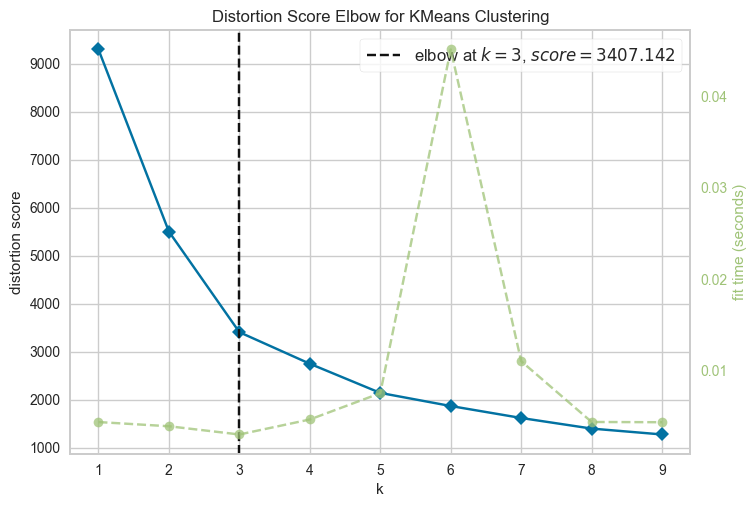


Menampilkan Elbow Method untuk X2


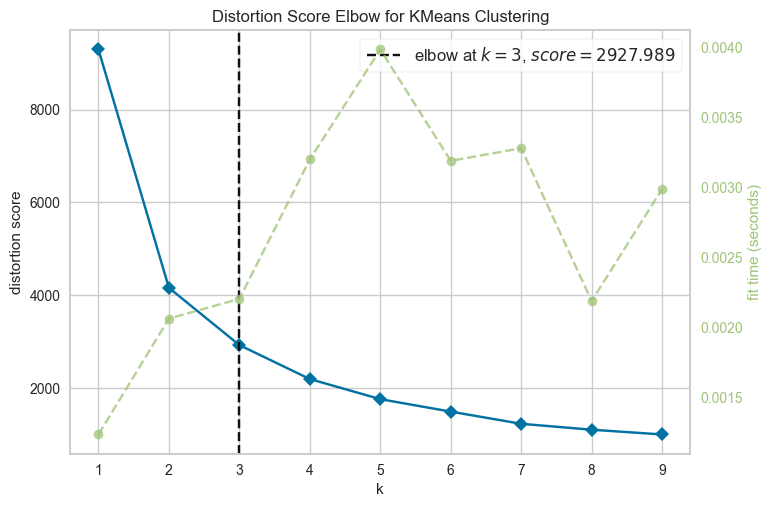


Menampilkan Elbow Method untuk X3


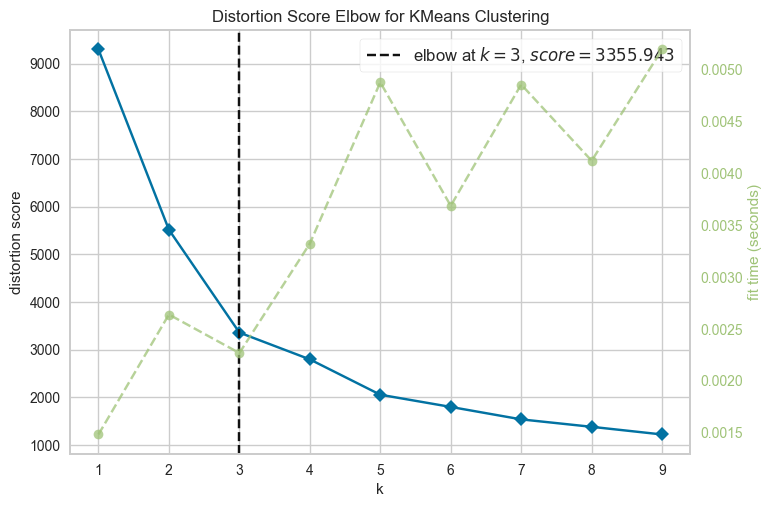


Menampilkan Elbow Method untuk X4


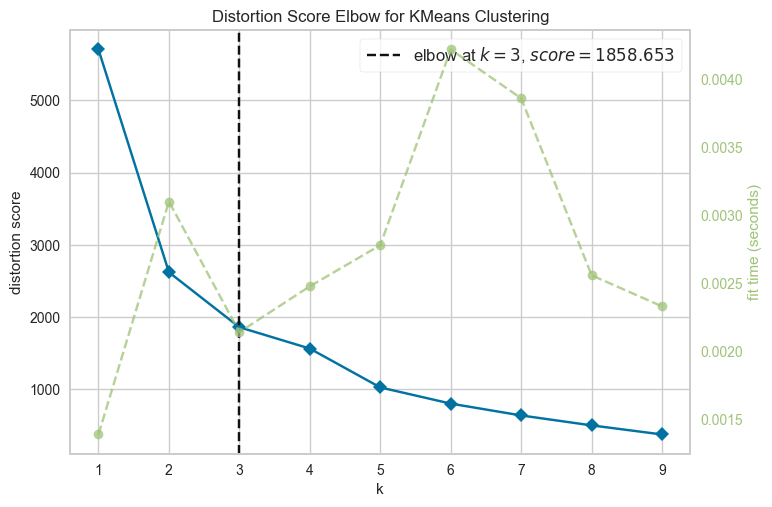


Menampilkan Elbow Method untuk X5


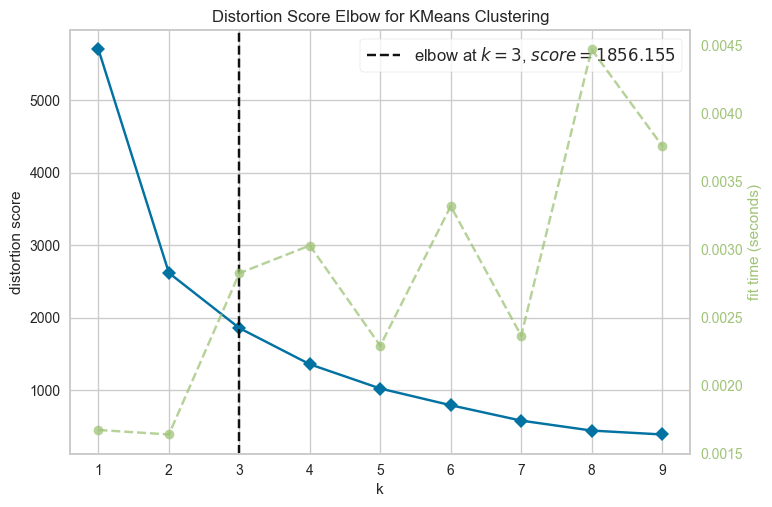


Menampilkan Elbow Method untuk X6


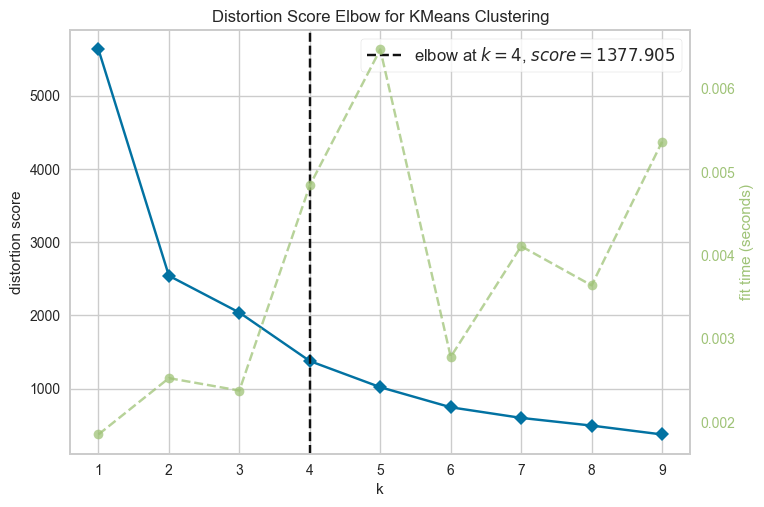


Menampilkan Elbow Method untuk X7


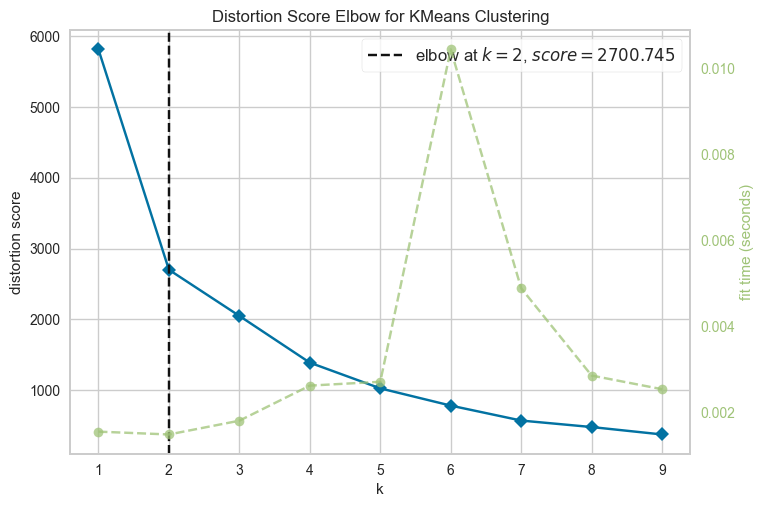


Menampilkan Elbow Method untuk X8


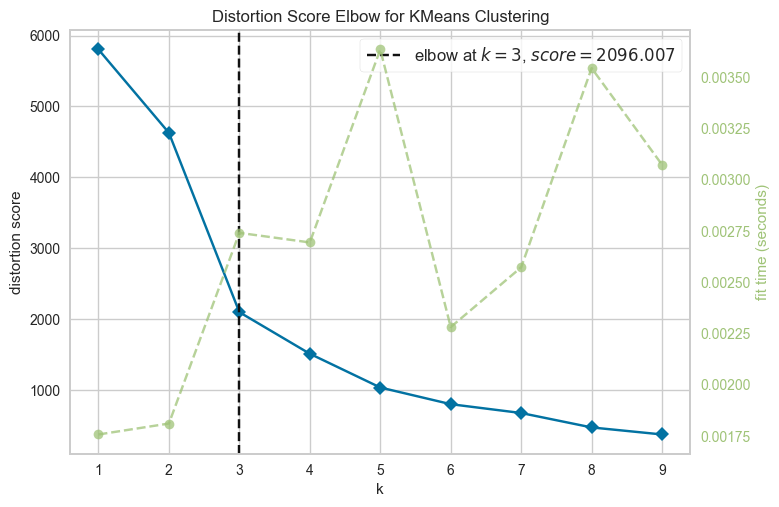


Menampilkan Elbow Method untuk X9


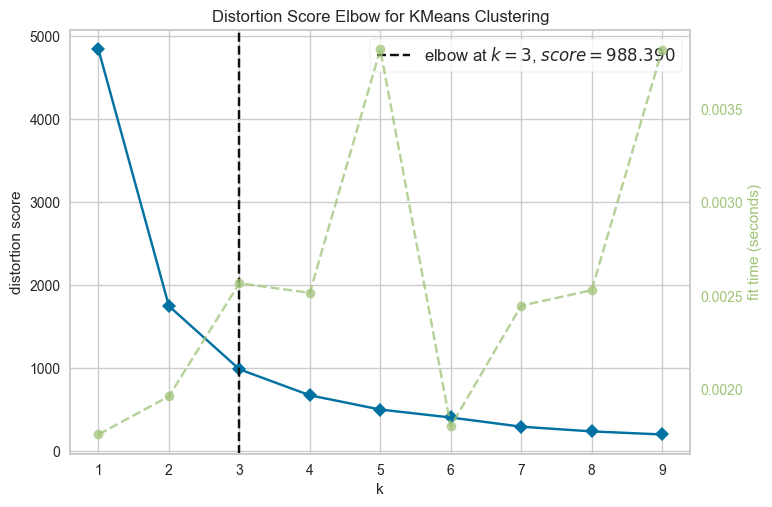


Menampilkan Elbow Method untuk X10


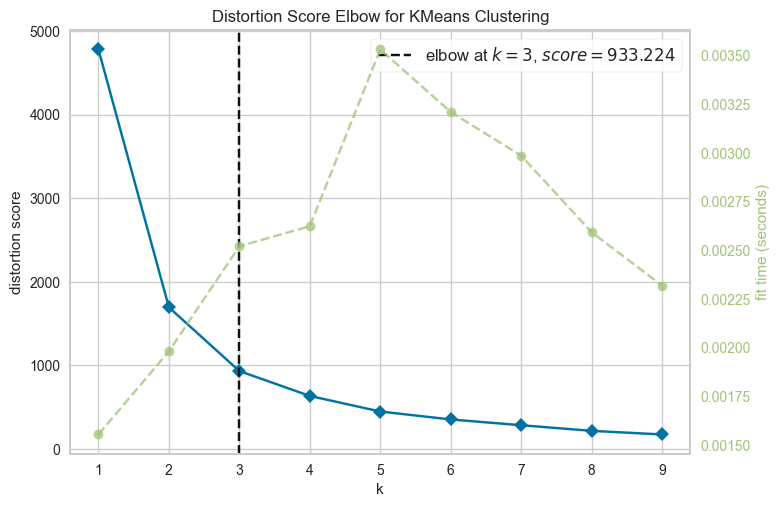


Menampilkan Elbow Method untuk X11


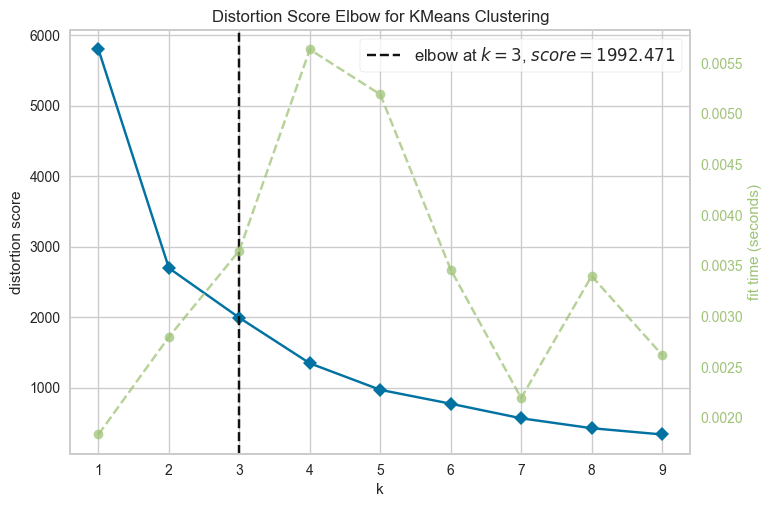


Menampilkan Elbow Method untuk X12


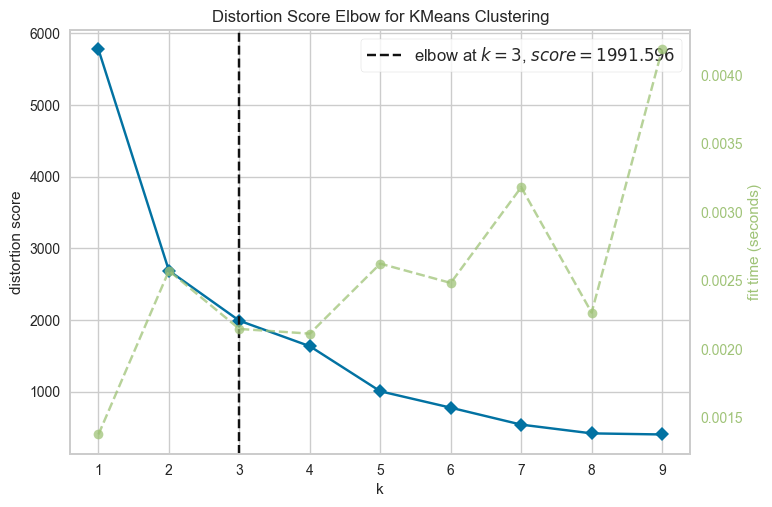


Menampilkan Elbow Method untuk X13


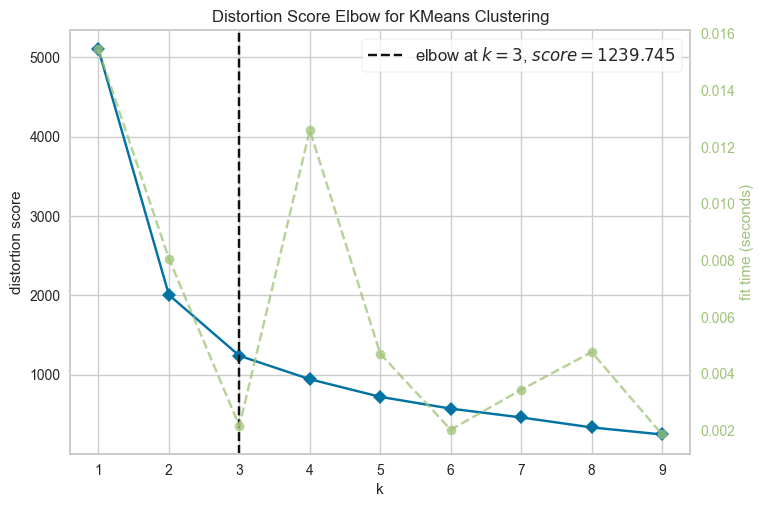


Menampilkan Elbow Method untuk X14


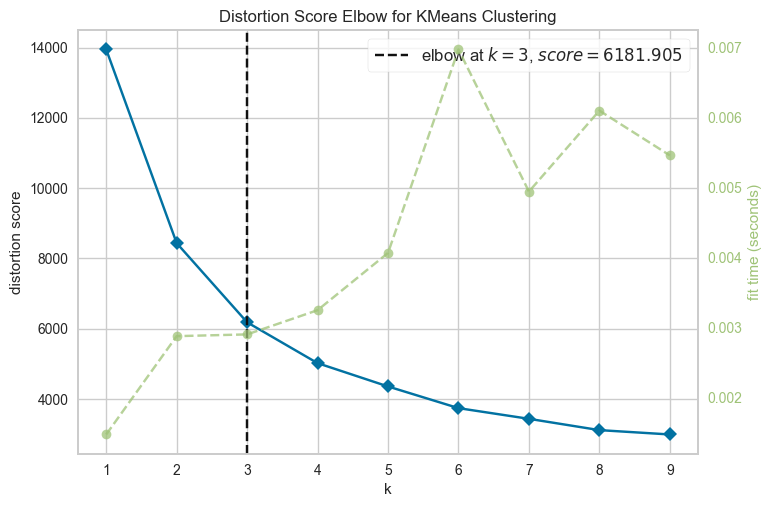

In [172]:
for name, X in zip(dataset_names, arrays_datasets):
    print(f"\nMenampilkan Elbow Method untuk {name}")
    Elbow_Viz(X)

In [180]:
x_labels = ["UMP", "UMP", "Pengeluaran", "UMP", "UMP", "UMP", "UMP", "UMP", "UMP", "UMP", "UMP", "UMP", "UMP"]
y_labels = ["Pengeluaran", "Upah Rata-rata", "Upah Rata-rata", "Pengeluaran Makanan", "Pengeluaran Non Makanan", 
            "Pengeluaran Total", "Kategori Miskin", "Kategori Rentan Miskin", "Kategori Tidak Miskin",
            "Garis Kemiskinan Indonesia", "Garis Kemiskinan Indonesia Barat", "Garis Kemiskinan Indonesia Tengah",
            "Garis Kemiskinan Indonesia Timur"]

# Loop untuk melatih model K-Means di setiap dataset
for name, X, x_label, y_label in zip(dataset_names, arrays_datasets, x_labels, y_labels):
    print(f"\n===== Training K-Means untuk {name} =====")
    
    # Inisialisasi dan latih model K-Means
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    
    # Ambil label hasil clustering
    labels = kmeans.labels_
    
    # Jumlah cluster
    k = 3
    
    # Analisis karakteristik cluster
    analyze_clusters(X, labels, k, x_label, y_label)


===== Training K-Means untuk X1 =====
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata XUMP: -0.83
Rata-rata YPengeluaran: -0.65

Cluster 2:
Rata-rata XUMP: 0.87
Rata-rata YPengeluaran: -0.21

Cluster 3:
Rata-rata XUMP: 0.08
Rata-rata YPengeluaran: 1.51

===== Training K-Means untuk X2 =====
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata XUMP: 0.45
Rata-rata YUpah Rata-rata: 0.11

Cluster 2:
Rata-rata XUMP: -0.94
Rata-rata YUpah Rata-rata: -0.87

Cluster 3:
Rata-rata XUMP: 0.96
Rata-rata YUpah Rata-rata: 1.57

===== Training K-Means untuk X3 =====
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata XPengeluaran: -0.04
Rata-rata YUpah Rata-rata: 1.24

Cluster 2:
Rata-rata XPengeluaran: 1.44
Rata-rata YUpah Rata-rata: -0.15

Cluster 3:
Rata-rata XPengeluaran: -0.64
Rata-rata YUpah Rata-rata: -0.60

===== Training K-Means untuk X4 =====
Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata XUMP: 0.67
Rata-rata YPengeluaran Makanan: 1.00

Cluster 

In [ ]:
from sklearn.cluster import KMeans
 
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3 dengan 2 fitur
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_estimators = kmeans.fit(X1)
# Mendapatkan label cluster
labels = cluster_estimators.labels_
# Mendapatkan jumlah cluster
k = 3
# Analisis karakteristik setiap cluster
analyze_clusters(X1, labels, k, "UMP", "Pengeluaran")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata XUMP: -0.83
Rata-rata YPengeluaran: -0.65

Cluster 2:
Rata-rata XUMP: 0.87
Rata-rata YPengeluaran: -0.21

Cluster 3:
Rata-rata XUMP: 0.08
Rata-rata YPengeluaran: 1.51


In [ ]:
# Melatih dan menganalisa model dengan 3 fitur
kmeans = KMeans(n_clusters=3, random_state=42)
fully_cluster_estimators = kmeans.fit(X14)
x_label = "UMP"
y_label = "Pengeluaran"
z_label = "Upah Rata-rata"
print("Analisis Karakteristik Setiap Cluster:")
for cluster_id in range(k):
    # Mengambil data untuk cluster saat ini
    cluster_data = X14[labels == cluster_id]
    
    # Menghitung rata-rata untuk setiap fitur dalam cluster
    mean_X = cluster_data[:, 0].mean()  # Rata-rata UMP
    mean_Y = cluster_data[:, 1].mean()  # Rata-rata Pengeluaran
    mean_Z = cluster_data[:, 2].mean()  # Rata-rata Upah Rata-rata
    
    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata {x_label}: {mean_X:.2f}")
    print(f"Rata-rata {y_label}: {mean_Y:.2f}")
    print(f"Rata-rata {z_label}: {mean_Z:.2f}")

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata UMP: 1.24
Rata-rata Pengeluaran: 0.26
Rata-rata Upah Rata-rata: 0.76

Cluster 2:
Rata-rata UMP: 0.01
Rata-rata Pengeluaran: 0.03
Rata-rata Upah Rata-rata: 0.05

Cluster 3:
Rata-rata UMP: -1.16
Rata-rata Pengeluaran: -0.29
Rata-rata Upah Rata-rata: -0.77


## **c. Feature Selection (Opsional)**

Setelah dibandingkan, ternyata semakin sedikit fitur yang digunakan, semakin cepat juga, tetapi untuk hasil, semakin banyak fitur yang berdampak langsung semakin baik. Oleh karena itu, saya menggunakan X14 sebagai model yang akan digunakan, tetapi untuk visualisasi saya akan menggunakan X1 dimana menggunakan fitur UMP vs Pengeluaran yang memiliki hasil clustering lebih baik dibandingkan lainnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.


In [175]:
# Fungsi untuk melakukan clustering dan visualisasi
def visualize_clusters(Estimators, X, title, x_label, y_label, n_clusters=3):
    centroids = Estimators.cluster_centers_
    # Visualisasi cluster
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
    # Menambahkan label centroid pada plot
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
    # Menambahkan judul dan label
    plt.title(f'Visualisasi Cluster: {title}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


Berikut adalah **rekomendasi** tahapannya.
1. Hasil clustering dalam bentuk visualisasi dengan grafik scatter plot atau 2D PCA projection untuk X1(UMP dan Pengeluaran).

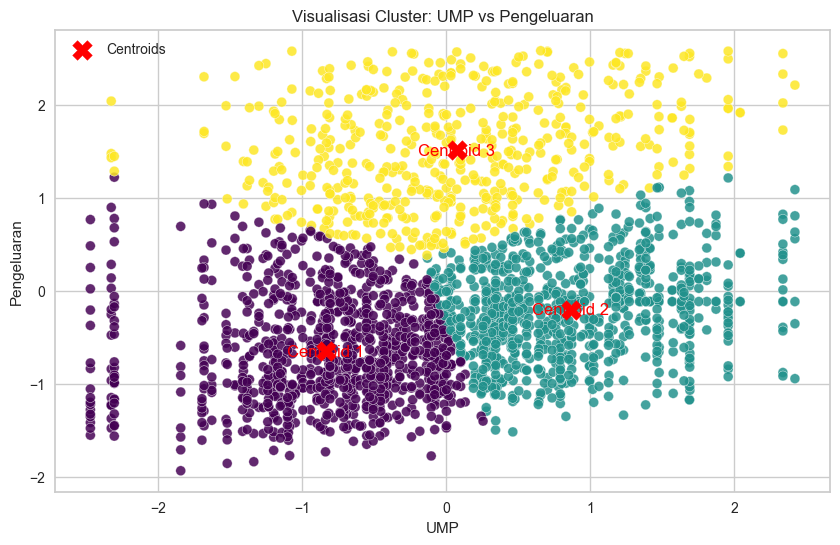

In [177]:
visualize_clusters(cluster_estimators, X1, "UMP vs Pengeluaran", "UMP", "Pengeluaran")

Dapat dianalisa model dapat menggolongkan menjadi 3 bagian dengna 2 fitur. Sakarang apa jadinya jika kita menggunakan 3 fitur?

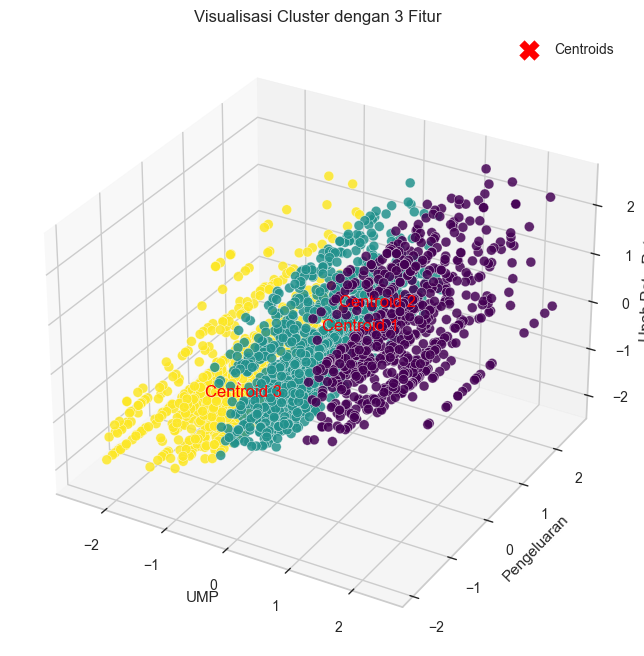

In [182]:
from mpl_toolkits.mplot3d import Axes3D
centroids = fully_cluster_estimators.cluster_centers_
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot data points
ax.scatter(X14[:, 0], X14[:, 1], X14[:, 2], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X', label='Centroids')
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    ax.text(centroid[0], centroid[1], centroid[2], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
# Menambahkan judul dan label
ax.set_title('Visualisasi Cluster dengan 3 Fitur')
ax.set_xlabel('UMP')
ax.set_ylabel('Pengeluaran')
ax.set_zlabel('Upah Rata-Rata')
ax.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [183]:
X14_Original = scaler.inverse_transform(df_cluster[columns_to_scale])
df_inverse = pd.DataFrame(X14_Original, columns=columns_to_scale)
df_inverse["Cluster"] = labels
print(df_inverse.head())

   Upah Minimum Provinsi  Pengeluaran  Upah_Rata_rata  Cluster
0              1900000.0     395136.0         11226.0        2
1              1900000.0     395136.0         11226.0        2
2              1900000.0     415354.0         11226.0        2
3              1900000.0     415354.0         11226.0        2
4              1900000.0     466355.0         11226.0        2


In [184]:
ShowUnique(df_inverse)

Upah Minimum Provinsi : 1900000.0, 2118500.0, 2500000.0, 2700000.0, 2916810.0, 3165031.0, 3166460.0, 1621172.0, 1807600.0, 1956727.0, 2127157.0, 2297969.0, 2494000.0, 2516971.0, 1600000.0, 1784000.0, 1931180.0, 2099385.0, 2267990.0, 2460997.0, 2501203.0, 1500000.0, 1605000.0, 1737412.0, 1888741.0, 2040407.0, 2213604.0, 2460996.0, 2238094.0, 988500.0, 1337645.0, 1454154.0, 1570923.0, 1704608.0, 2215000.0, 1840916.0, 3100000.0, 3355750.0, 2267356.0, 1765000.0, 1875000.0, 2030000.0, 2206813.0, 2384020.0, 2788826.0, 2800580.0, 1790342.0, 1997819.0, 2073332.0, 2268874.0, 2455662.0, 2672371.0, 2684743.0, 2729463.0, 1710000.0, 1906650.0, 2063000.0, 2243719.0, 2423889.0, 2630162.0, 2698941.0, 1000000.0, 2250000.0, 1420624.0, 1544361.0, 1668373.0, 1810351.0, 1841487.0, 910000.0, 1367000.0, 1486065.0, 1605396.0, 1742015.0, 1812935.0, 1338000.0, 1508895.0, 1630059.0, 1768777.0, 1798979.0, 1891567.0, 1560000.0, 1739400.0, 1882900.0, 2046900.0, 2211500.0, 2399699.0, 1868777.0, 2434328.0, 1870000.0,

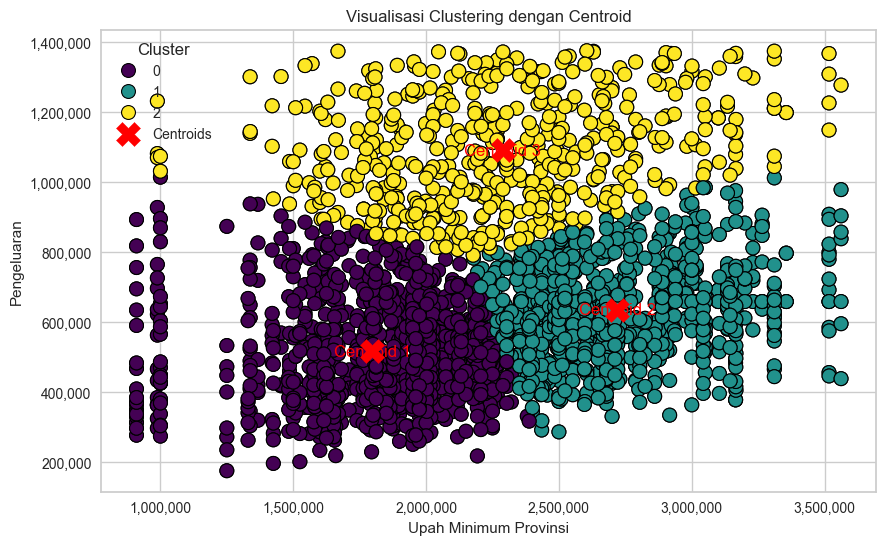

Nilai Centroids:
Centroid 1: Upah Minimum Provinsi = Rp. 1,796,418, Pengeluaran = Rp.516,870
Centroid 2: Upah Minimum Provinsi = Rp. 2,718,950, Pengeluaran = Rp.634,661
Centroid 3: Upah Minimum Provinsi = Rp. 2,289,149, Pengeluaran = Rp.1,091,833


In [185]:
import matplotlib.ticker as ticker
# === [1] Pilih Fitur untuk Clustering ===
selected_features = ["Upah Minimum Provinsi", "Pengeluaran"]

# Copy dataset asli
df_original = df_inverse.copy()

# === [2] Standardisasi Data ===
scaler = StandardScaler()
df_scaled = df_inverse.copy()
df_scaled[selected_features] = scaler.fit_transform(df_inverse[selected_features])

# === [3] Melakukan Clustering KMeans ===
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled[selected_features])

# === [4] Inverse Transform Centroid (Mengembalikan ke Skala Asli) ===
centroids_scaled = kmeans.cluster_centers_  # Centroid dalam skala standar
centroids_original = scaler.inverse_transform(centroids_scaled)  # Kembalikan ke skala asli

# === [5] Visualisasi Hasil Clustering ===
plt.figure(figsize=(10, 6))

# Scatter plot data
sns.scatterplot(x=df_original["Upah Minimum Provinsi"], 
                y=df_original["Pengeluaran"], 
                hue=df_scaled["Cluster"], 
                palette="viridis", 
                s=100, edgecolor='black')

# Scatter plot centroid
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            c='red', s=300, marker='X', label='Centroids')

# Tambahkan label centroid
for i, (x, y) in enumerate(centroids_original):
    plt.text(x, y, f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menonaktifkan notasi ilmiah di sumbu
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Menambahkan judul dan label
plt.title("Visualisasi Clustering dengan Centroid")
plt.xlabel("Upah Minimum Provinsi")
plt.ylabel("Pengeluaran")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids_original):
    print(f"Centroid {i+1}: Upah Minimum Provinsi = Rp. {centroid[0]:,.0f}, Pengeluaran = Rp.{centroid[1]:,.0f}")

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1: Terdapat pekerja Indonesia yang memiliki Upah minimum Provinsi dengan rata-rata sebesar Rp. 1,796,418 dengan Pengeluaran perkapita sebesar Rp.516,870
2. Cluster 2: Terdapat pekerja Indonesia yang memiliki Upah minimum Provinsi dengan rata-rata sebesar Rp. 2,718,950 dengan Pengeluaran perkapita sebesar = Rp.634,661
3. Cluster 3: Terdapat pekerja Indonesia yang memiliki Upah minimum Provinsi dengan rata-rata sebesar Rp. 2,289,149 dengan Pengeluaran perkapita sebesar = Rp.1,091,833

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Upah Minimum Provinsi(Rp):**  1,796,418 
- **Rata-rata Pengeluaran perkapita(Rp):** 516,870
- **Analisis:** Cluster ini mencakup pekerja Indonesia dengan pendapatan rata-rata perbulan dan jumlah pengeluaran rata-rata yang rendah. Pekerja dalam cluster ini cenderung memiliki gaya hidup yang hemat karena jumlah gaji yang rendah.

## Cluster 2:
- **Rata-rata Upah Minimum Provinsi(Rp):** 2,718,950 
- **Rata-rata Pengeluaran perkapita(Rp):** 634,661
- **Analisis:** Cluster ini mencakup pekerja Indonesia dengan pendapatan rata-rata perbulan yang tinggi, tetapi jumlah pengeluaran rata-rata yang rendah. Pekerja dalam cluster ini cenderung memiliki gaya hidup yang hemat meskipun memiliki gaji yang tinggi.

## Cluster 3:
- **Rata-rata Upah Minimum Provinsi(Rp):**  2,289,149 
- **Rata-rata Pengeluaran perkapita(Rp):** 1,091,833
- **Analisis:** Cluster ini mencakup pekerja Indonesia dengan pendapatan rata-rata perbulan yang tidak terlalu tinggi, tetapi tidak terlalu rendah juga, tetapi jumlah pengeluaran rata-rata yang hampir setengah dari gaji mereka. Pekerja dalam cluster ini cenderung memiliki gaya hidup yang tinggi karena diimbangi dengan jummlah gaji yang tinggi(relatif).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [186]:
df_inverse.to_csv("Kesejahteraan Pekerja Indonesia.csv", index=False)